In [5]:
#Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

#Model -- model of the car
#Price  -- Offer Price in EUROs	
#Age_08_04 -- Age in months as in August 2004	
#Mfg_Month -- Manufacturing month (1-12)	
#Mfg_Year	-- Manufacturing Year
#KM -- Accumulated Kilometers on odometer
#Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
#HP -- Horse Power
#Met_Color	 -- Metallic Color?  (Yes=1, No=0)
#Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
#Automatic	-- Automatic ( (Yes=1, No=0)
#cc -- Cylinder Volume in cubic centimeters
#Doors -- Number of doors
#Cylinders	-- Number of cylinders
#Gears -- Number of gear positions
#Quarterly_Tax -- Quarterly road tax in EUROs
#Weight -- Weight in Kilograms
#Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
#BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
#Guarantee_Period -- 	Guarantee period in months
#ABS -- Anti-Lock Brake System (Yes=1, No=0)
#Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
#Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
#Airco -- Airconditioning  (Yes=1, No=0)
#Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
#Boardcomputer -- Boardcomputer  (Yes=1, No=0)
#CD_Player -- CD Player  (Yes=1, No=0)
#Central_Lock -- Central Lock  (Yes=1, No=0)
#Powered_Windows -- Powered Windows  (Yes=1, No=0)
#Power_Steering -- Power Steering  (Yes=1, No=0)
#Radio -- Radio  (Yes=1, No=0)
#Mistlamps	-- Mistlamps  (Yes=1, No=0)
#Sport_Model -- Sport Model  (Yes=1, No=0)
#Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
#Metallic_Rim --Metallic Rim  (Yes=1, No=0)
#Radio_cassette -- Radio Cassette  (Yes=1, No=0)
#Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('ToyotaCorolla.csv')

In [8]:
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     �TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [9]:
df2 =pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [15]:
df3 = df2.rename({'Price' : 'Pc' ,'Age_08_04'  : 'Age', 'cc' : 'CC' ,'Quarterly_Tax': 'QT', 'Weight': 'WT'},axis=1)
df3

Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1431   7500   69  20544   86  1300      3      5   69  1025
1432  10845   72  19000   86  1300      3      5   69  1015
1433   8500   71  17016   86  1300      3      5   69  1015
1434   7250   70  16916   86  1300      3      5   69  1015
1435   6950   76      1  110  1600      5      5   19  1114

[1436 rows x 9 columns]

In [30]:
#Data Visualization 

plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250
sns.set_style('darkgrid')

In [25]:
df3[df3.duplicated()]

Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
113  24950    8  13253  116  2000      5      5  234  1320

In [26]:
df4 = df3.drop_duplicates().reset_index(drop=True)

In [27]:
df4

Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1430   7500   69  20544   86  1300      3      5   69  1025
1431  10845   72  19000   86  1300      3      5   69  1015
1432   8500   71  17016   86  1300      3      5   69  1015
1433   7250   70  16916   86  1300      3      5   69  1015
1434   6950   76      1  110  1600      5      5   19  1114

[1435 rows x 9 columns]

In [28]:
df4.describe()

Pc          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT           WT  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [29]:
df4.corr()

Pc       Age        KM        HP        CC     Doors     Gears  \
Pc     1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age   -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM    -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP     0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC     0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors  0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears  0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT     0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
WT     0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

             QT        WT  
Pc     0.211508  0.575869  
Age   -0.193319 -0.466484  
KM     0.283312 -0.023969  
HP    -0.302287  0.087143  
CC     0.305982  0.335077  
Doors  0.107353  0.301734  
Gears -0.005125  0.021238  
QT     1.000000  0.621988  
WT     0.621988  1.000000

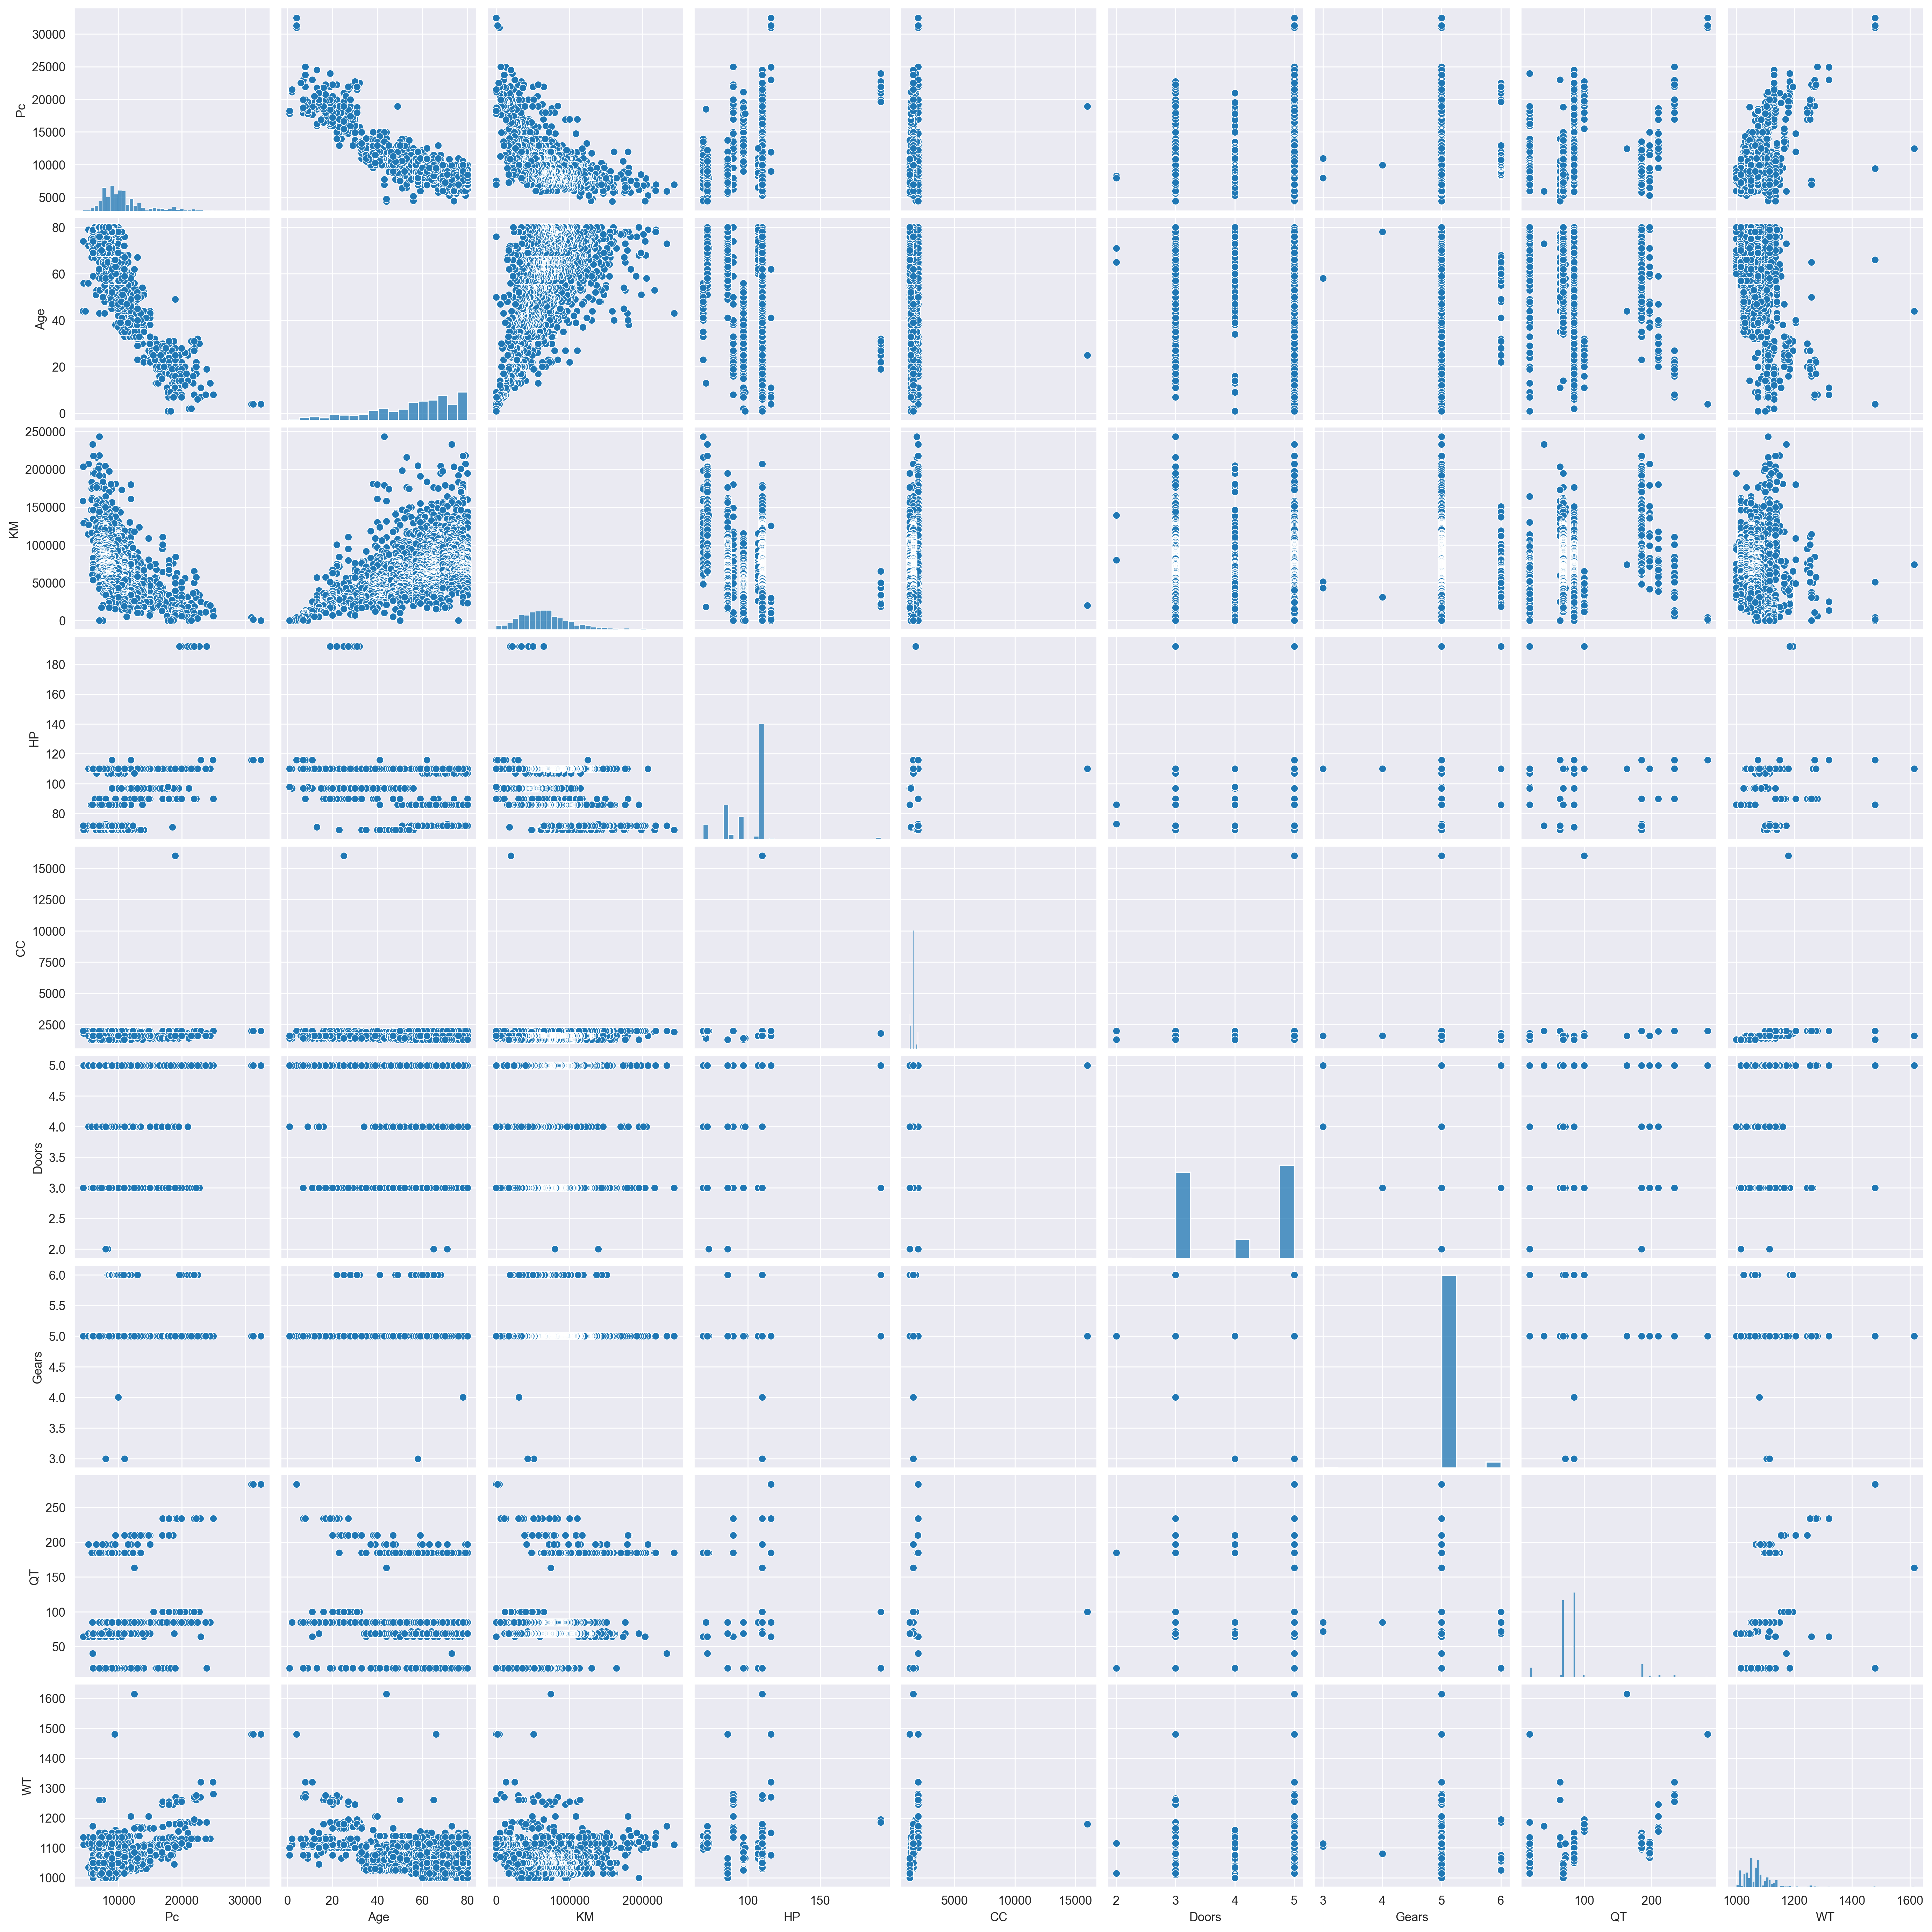

In [31]:
sns.pairplot(df4)

In [32]:
#Model Buildings 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [36]:
model = smf.ols('Pc~Age+KM+HP+CC+Doors+Gears+QT+WT' ,data=df4).fit()

model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [37]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 WT           15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 WT           0.00000
 dtype: float64)

In [38]:
# Finding rsquared values
model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

In [39]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues
slr_c=smf.ols('Pc~CC',data=df4).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [40]:
slr_d=smf.ols('Pc~Doors',data=df4).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [41]:
mlr_cd=smf.ols('Pc~CC+Doors',data=df4).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [44]:
#Model Validation Techniques
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data=df4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data=df4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data=df4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data=df4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7        WT  2.487180

In [ ]:
#No Collinearity

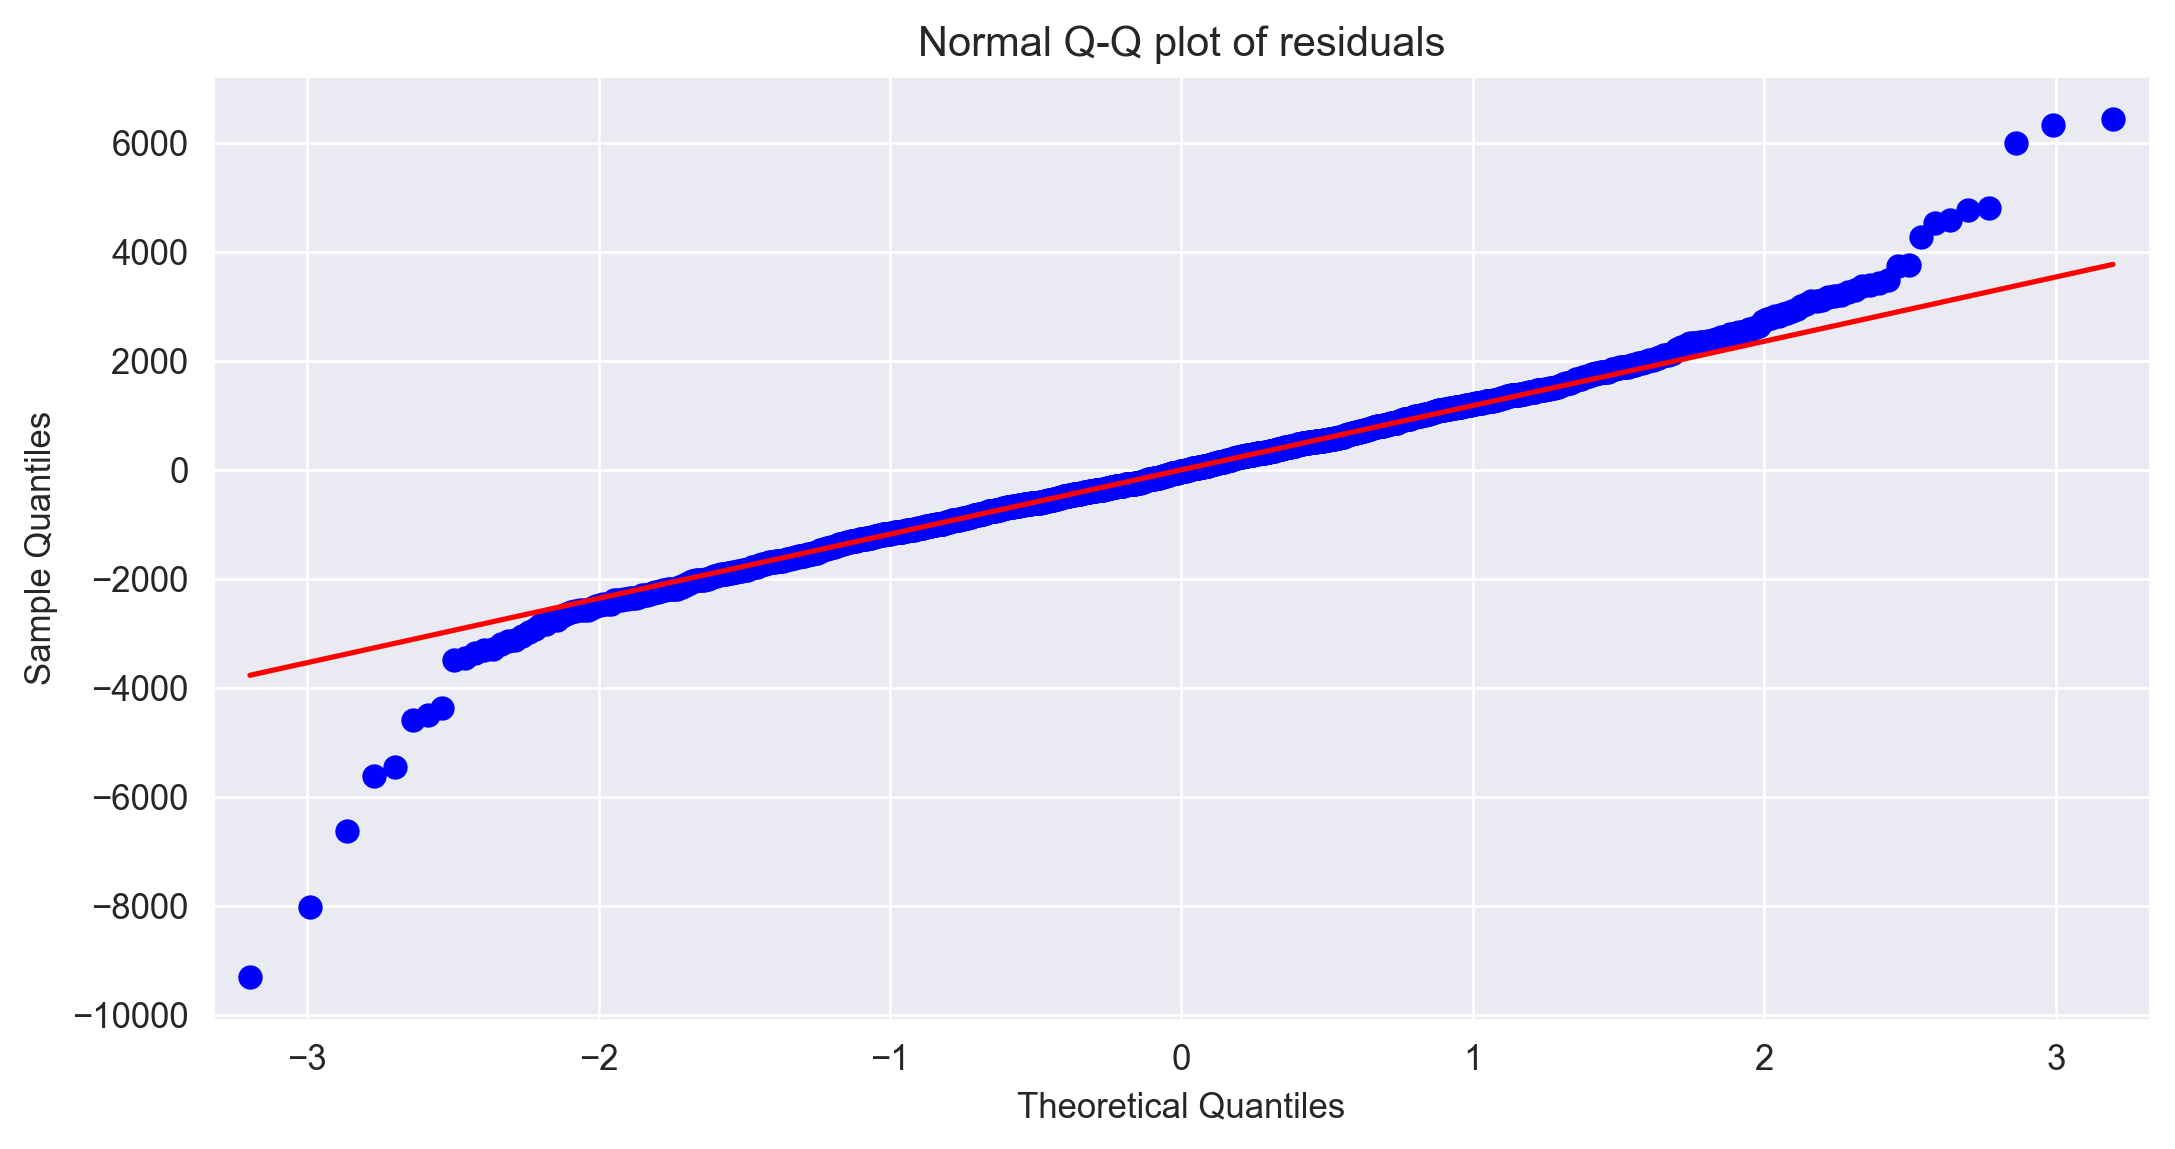

In [45]:
#Residual AnalysisQ_Q Plot
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

In [49]:
np.where(model.resid>6000)

(array([109, 146, 522], dtype=int64),)

In [50]:
np.where(model.resid<-6000)

(array([220, 600, 959], dtype=int64),)

In [ ]:
#residual plot of homoscedacity 

Text(0, 0.5, 'Residuals')

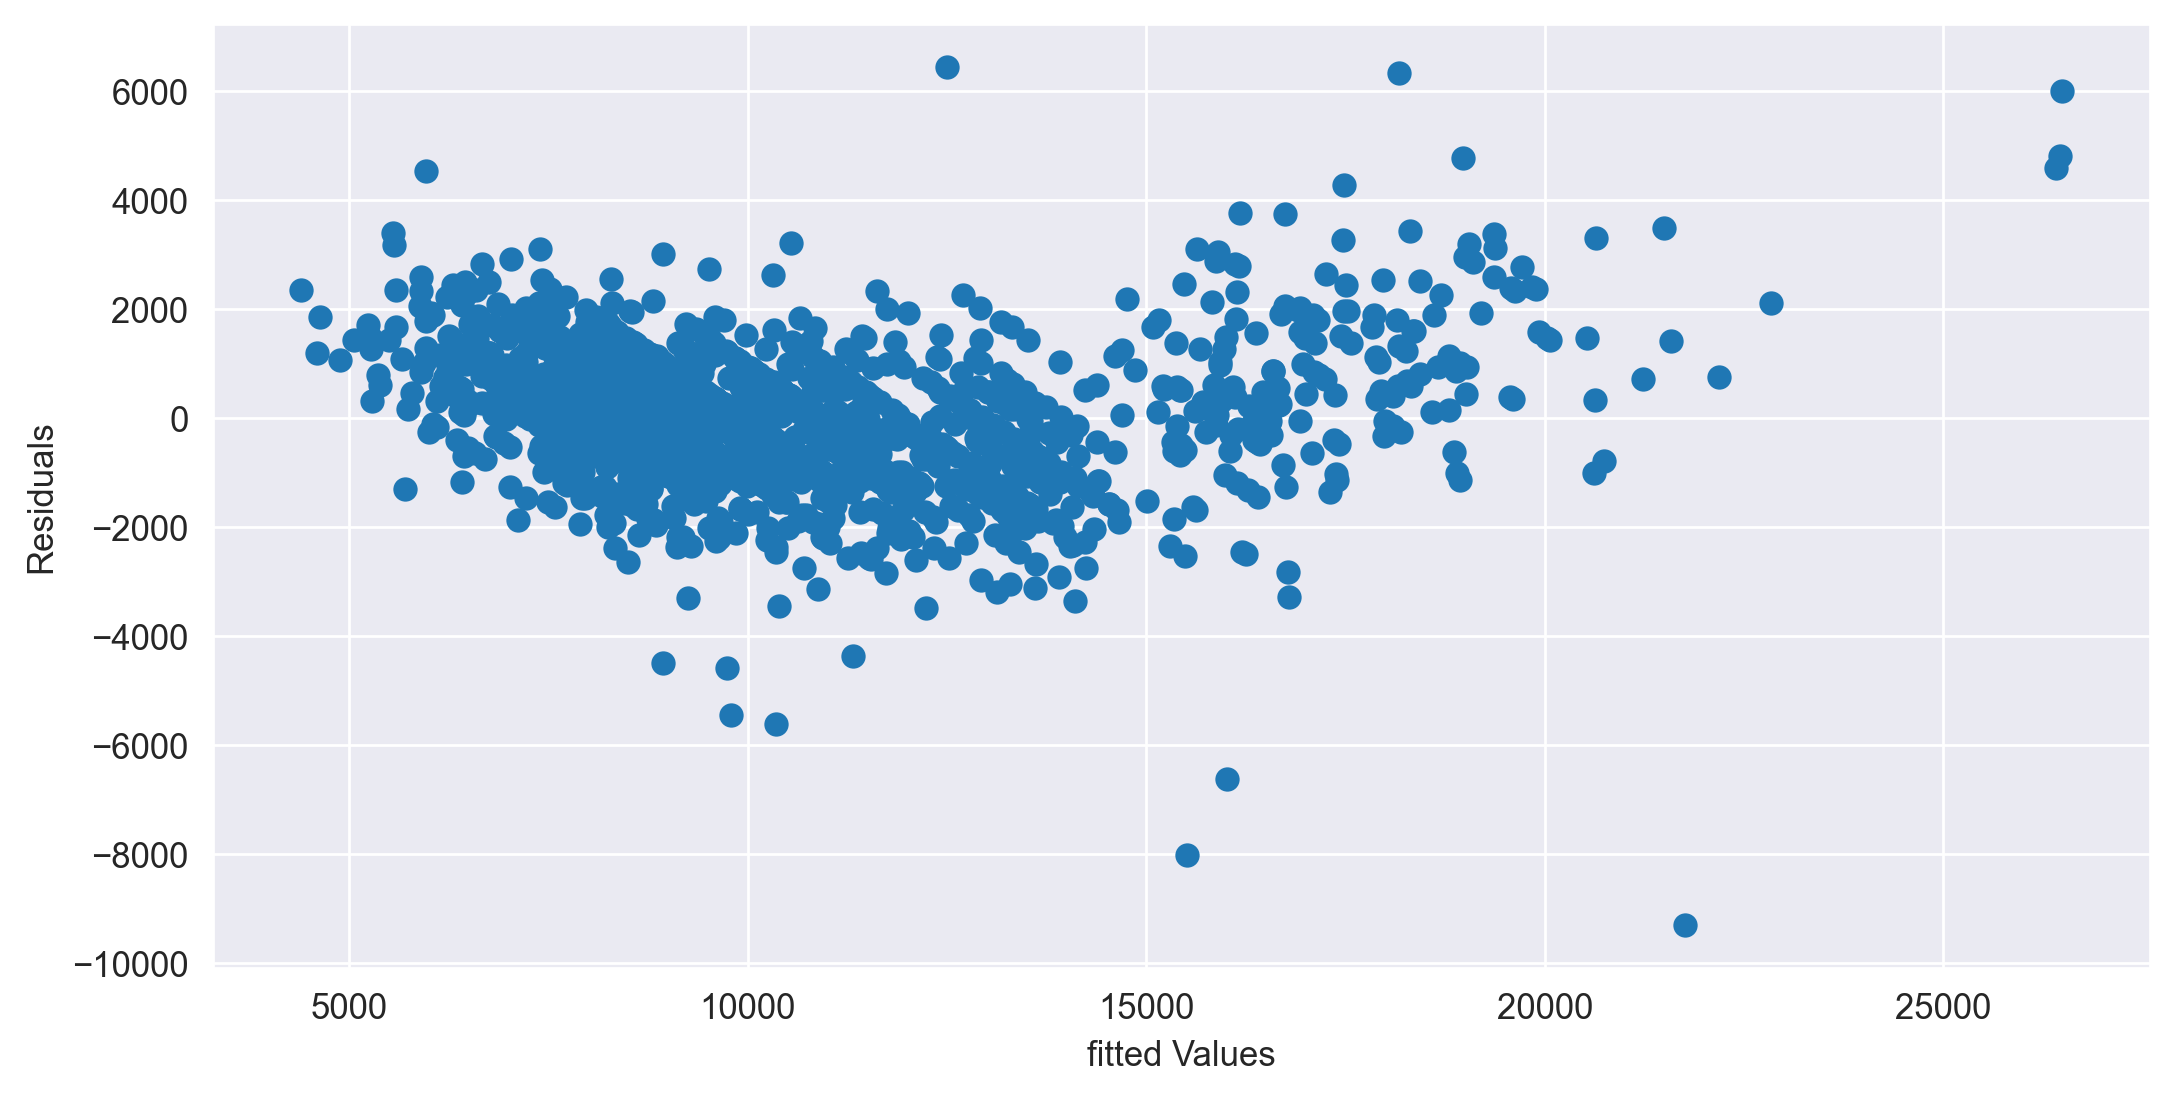

In [52]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel ('fitted Values')
plt.ylabel('Residuals')

In [ ]:
#residual vs Regressor 


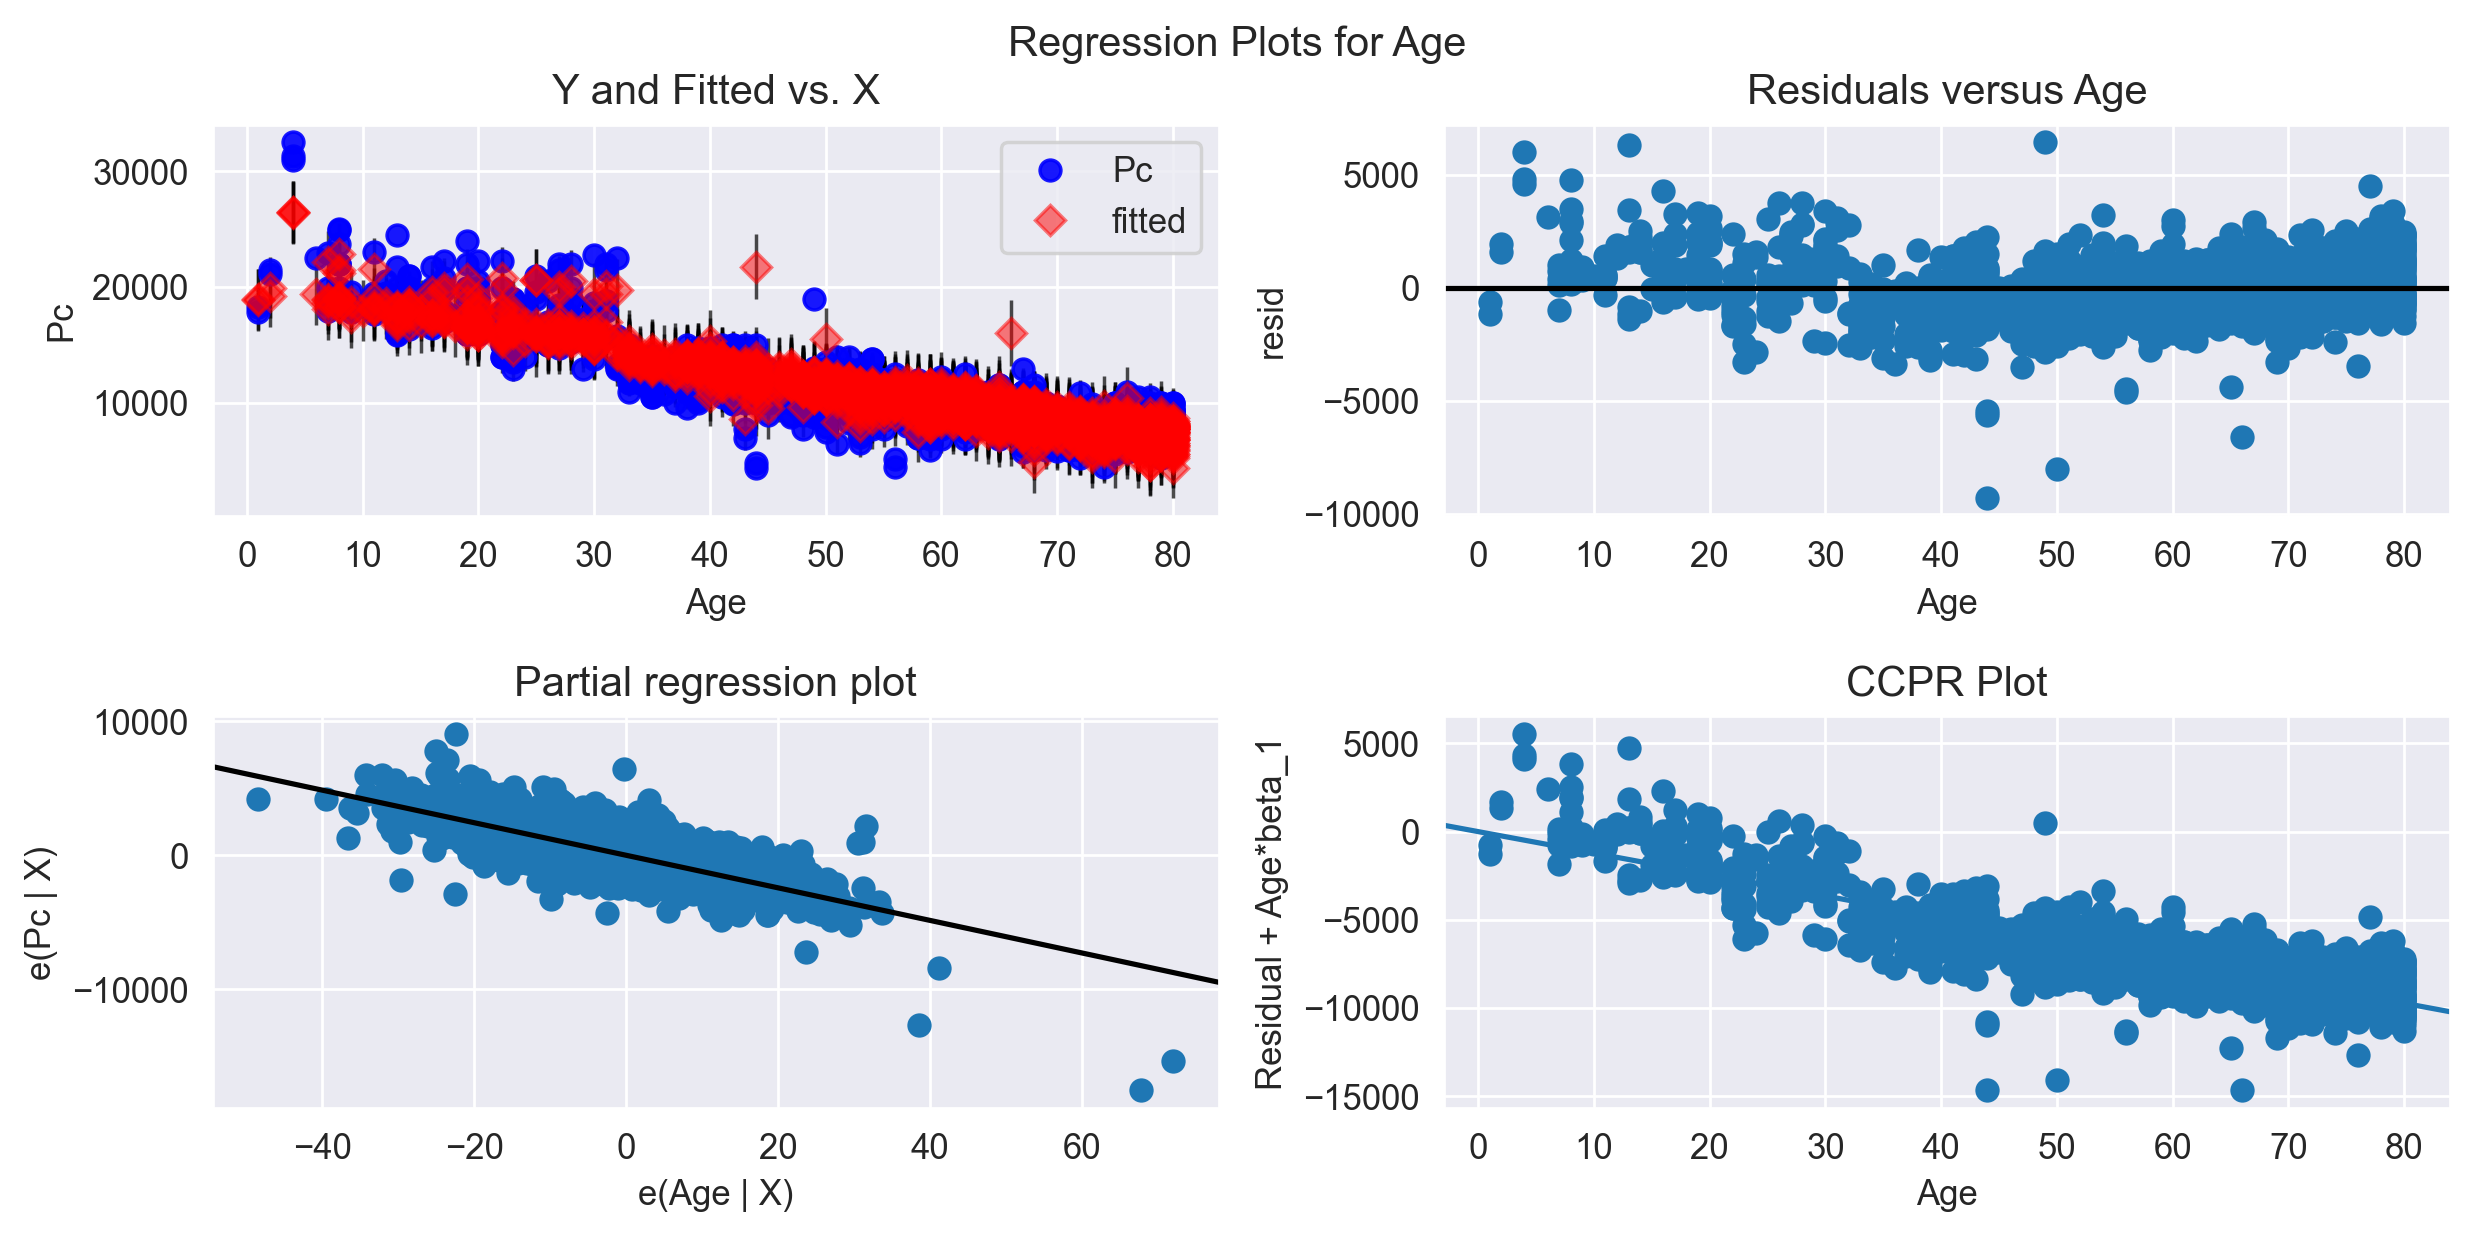

In [53]:
#Age
sm.graphics.plot_regress_exog(model,'Age');

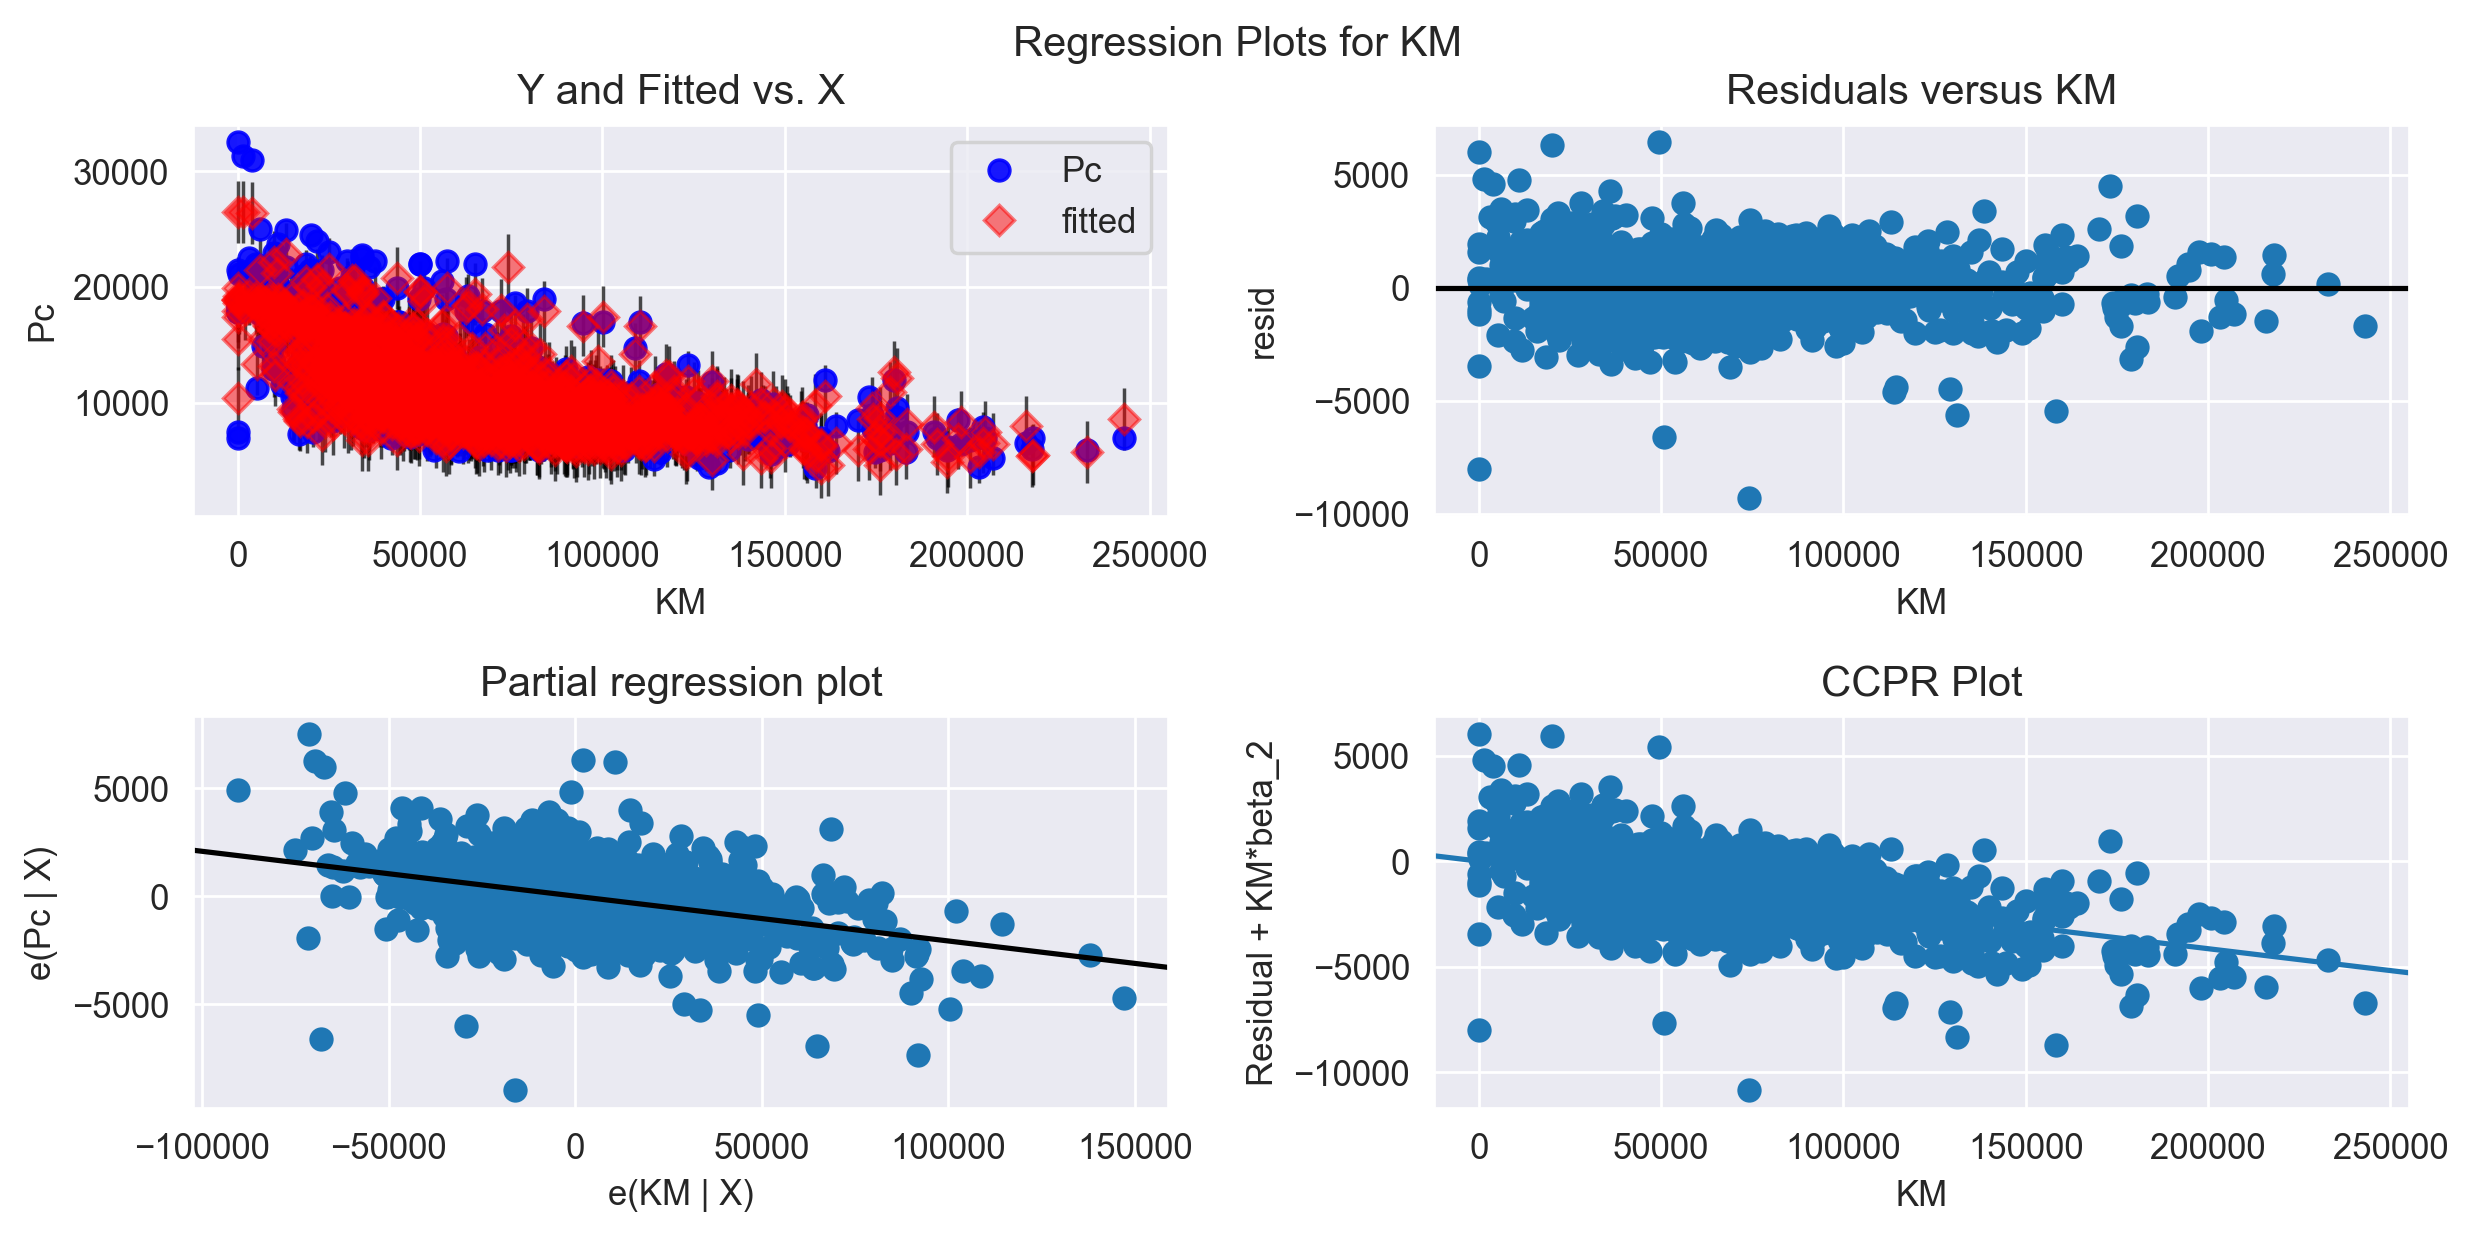

In [54]:
#KM
sm.graphics.plot_regress_exog(model,'KM');

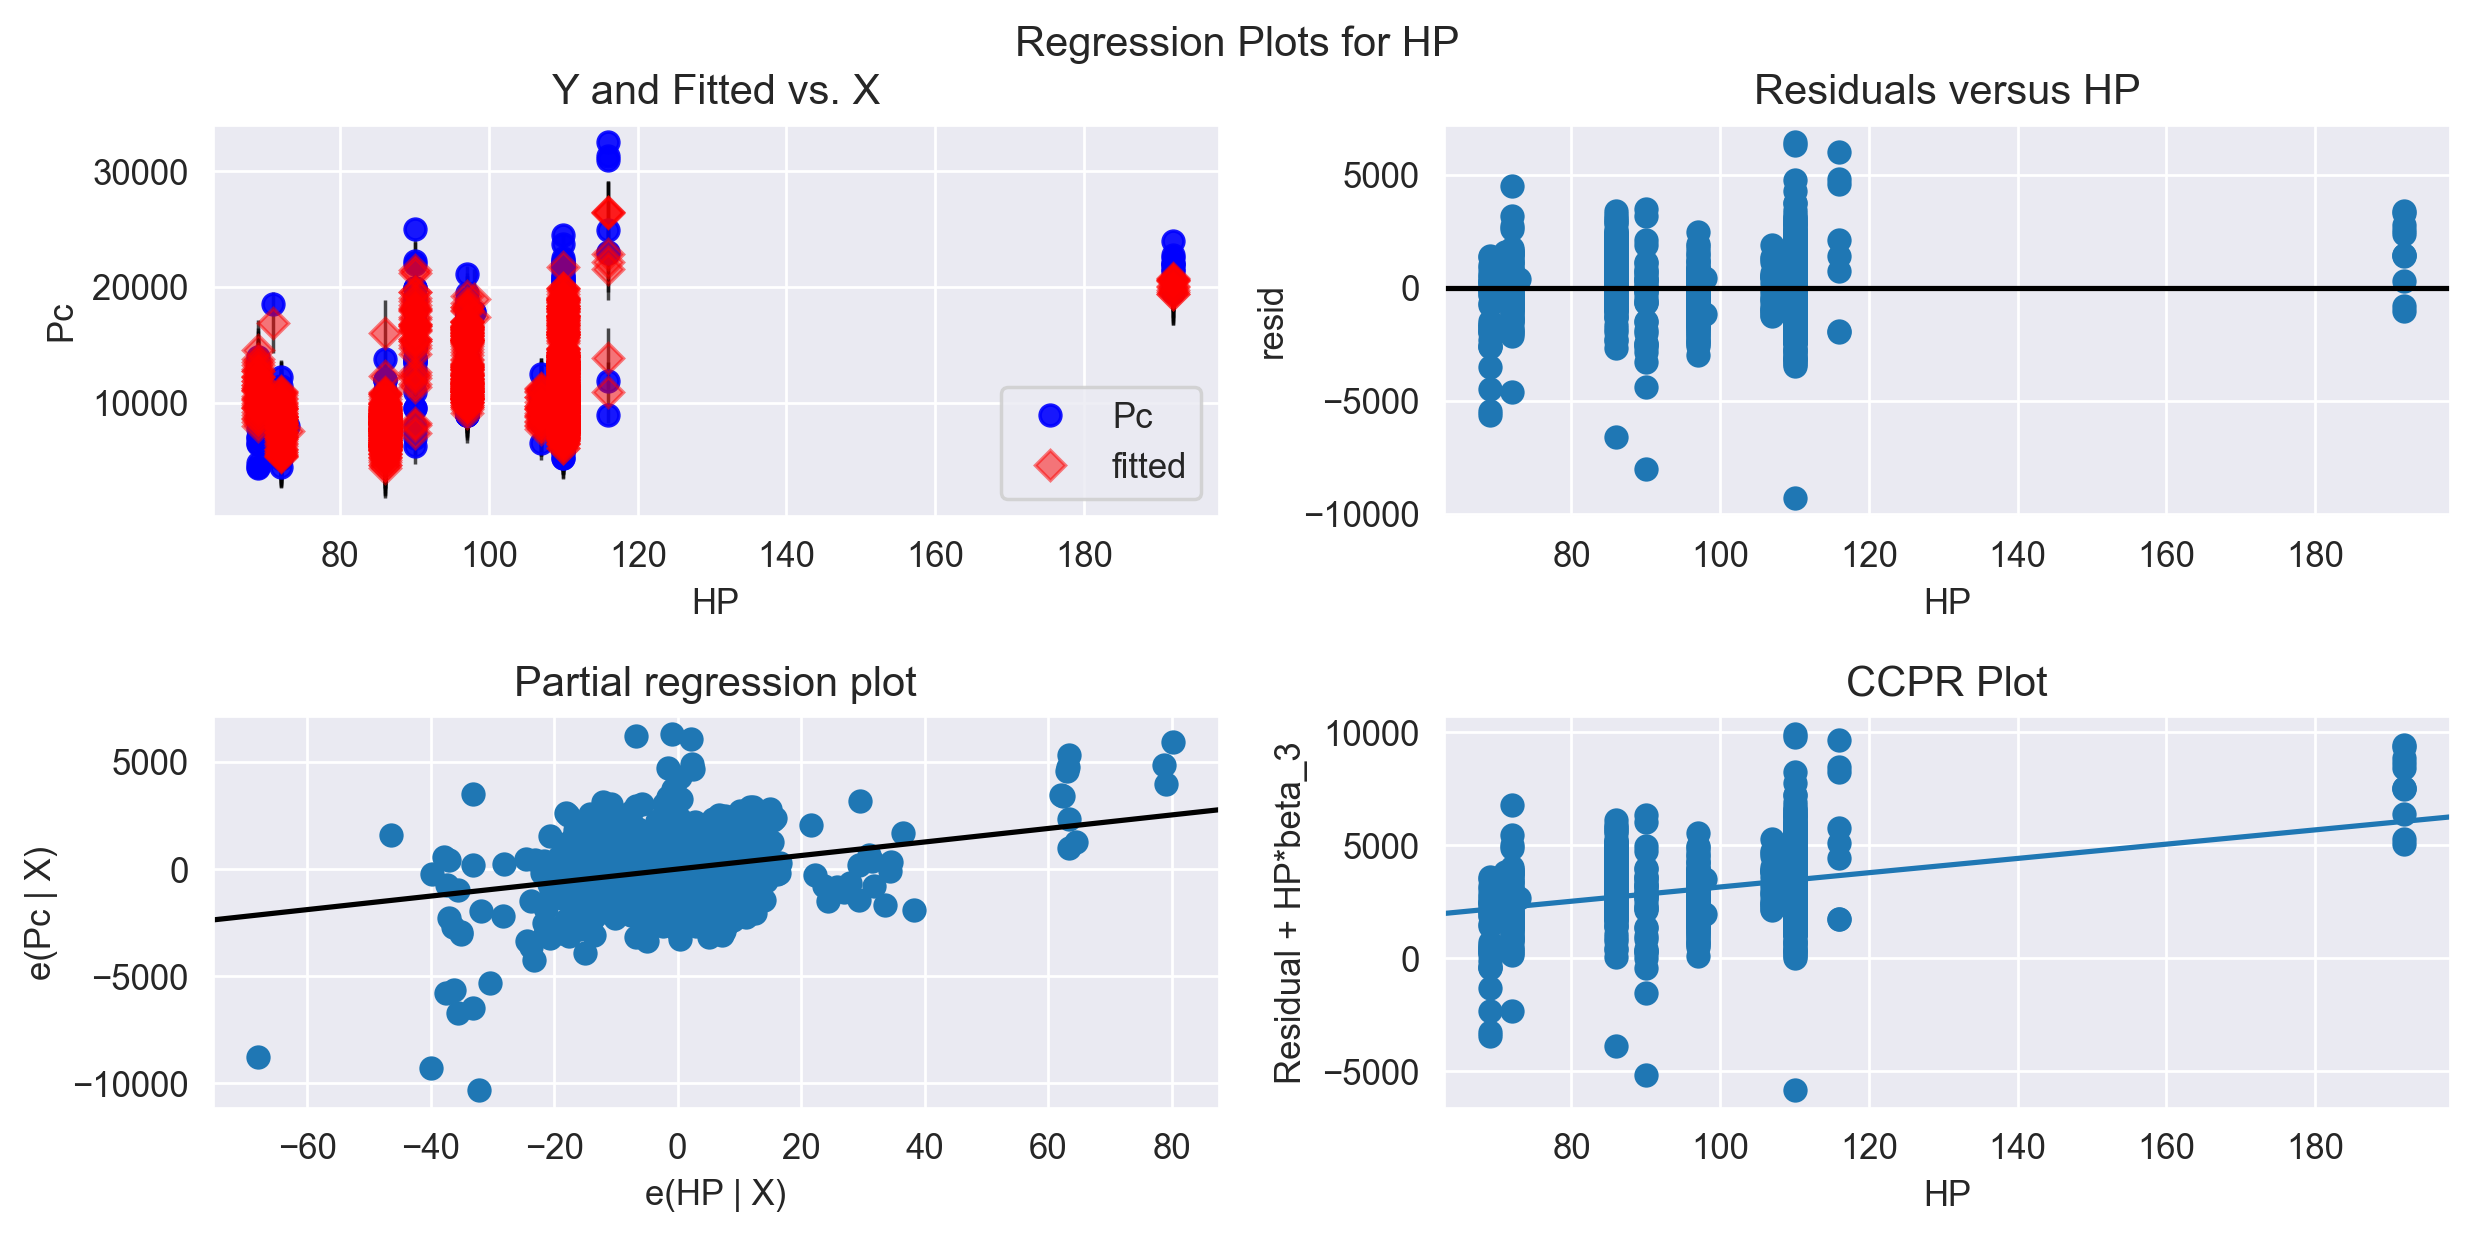

In [56]:
#HP
sm.graphics.plot_regress_exog(model,'HP');

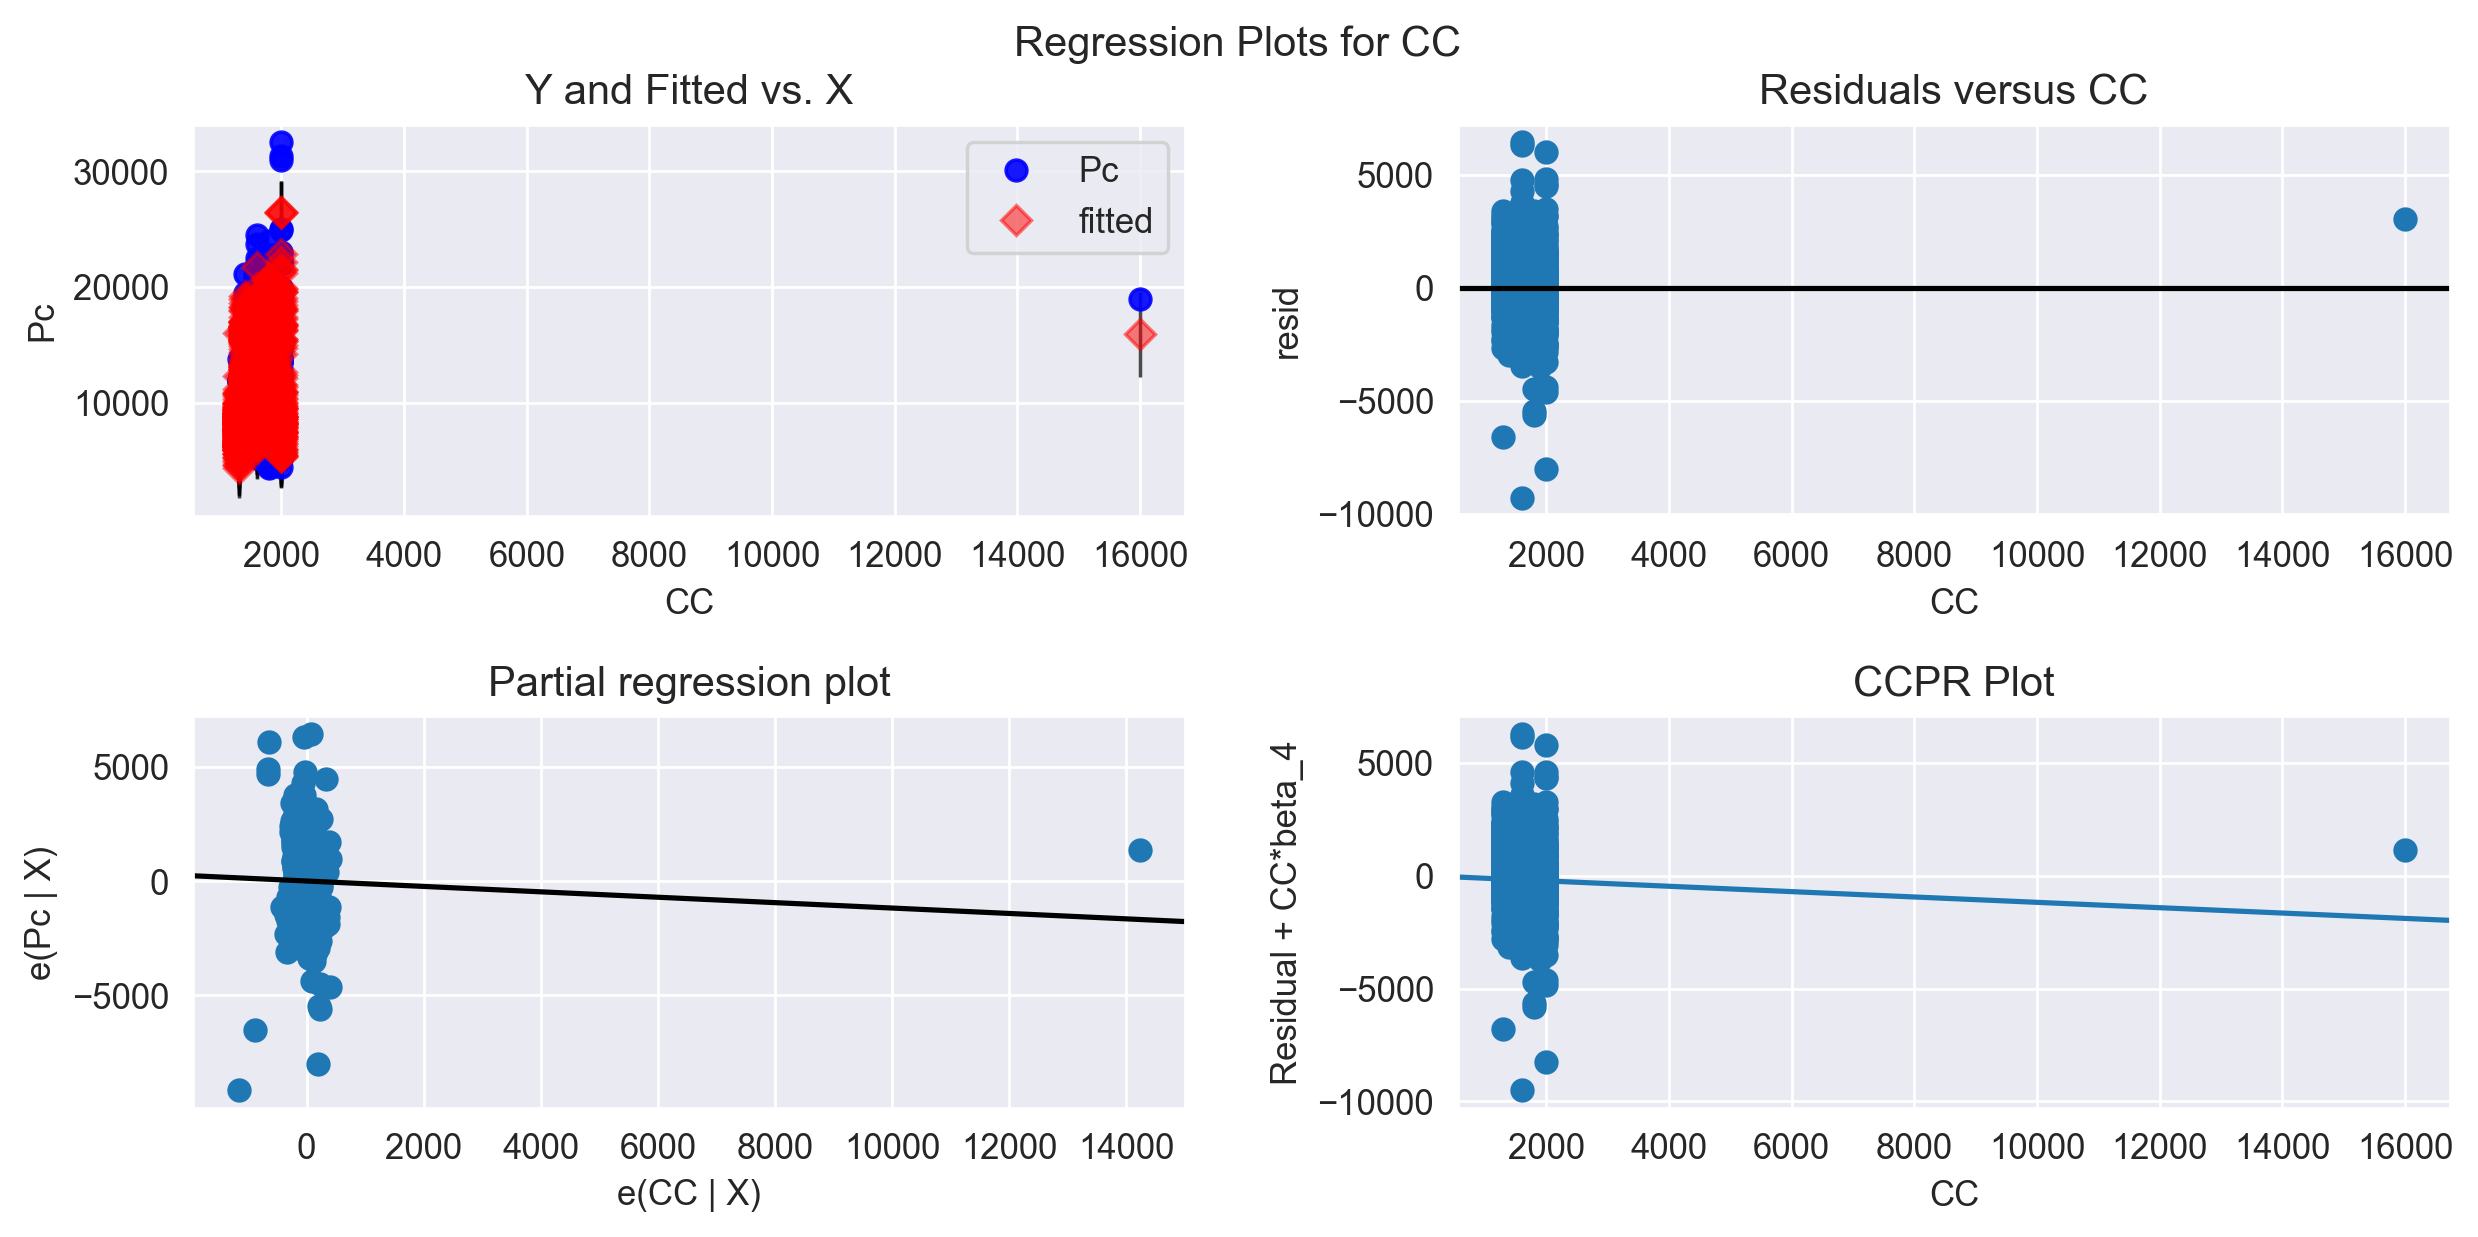

In [57]:
#CC
sm.graphics.plot_regress_exog(model,'CC');

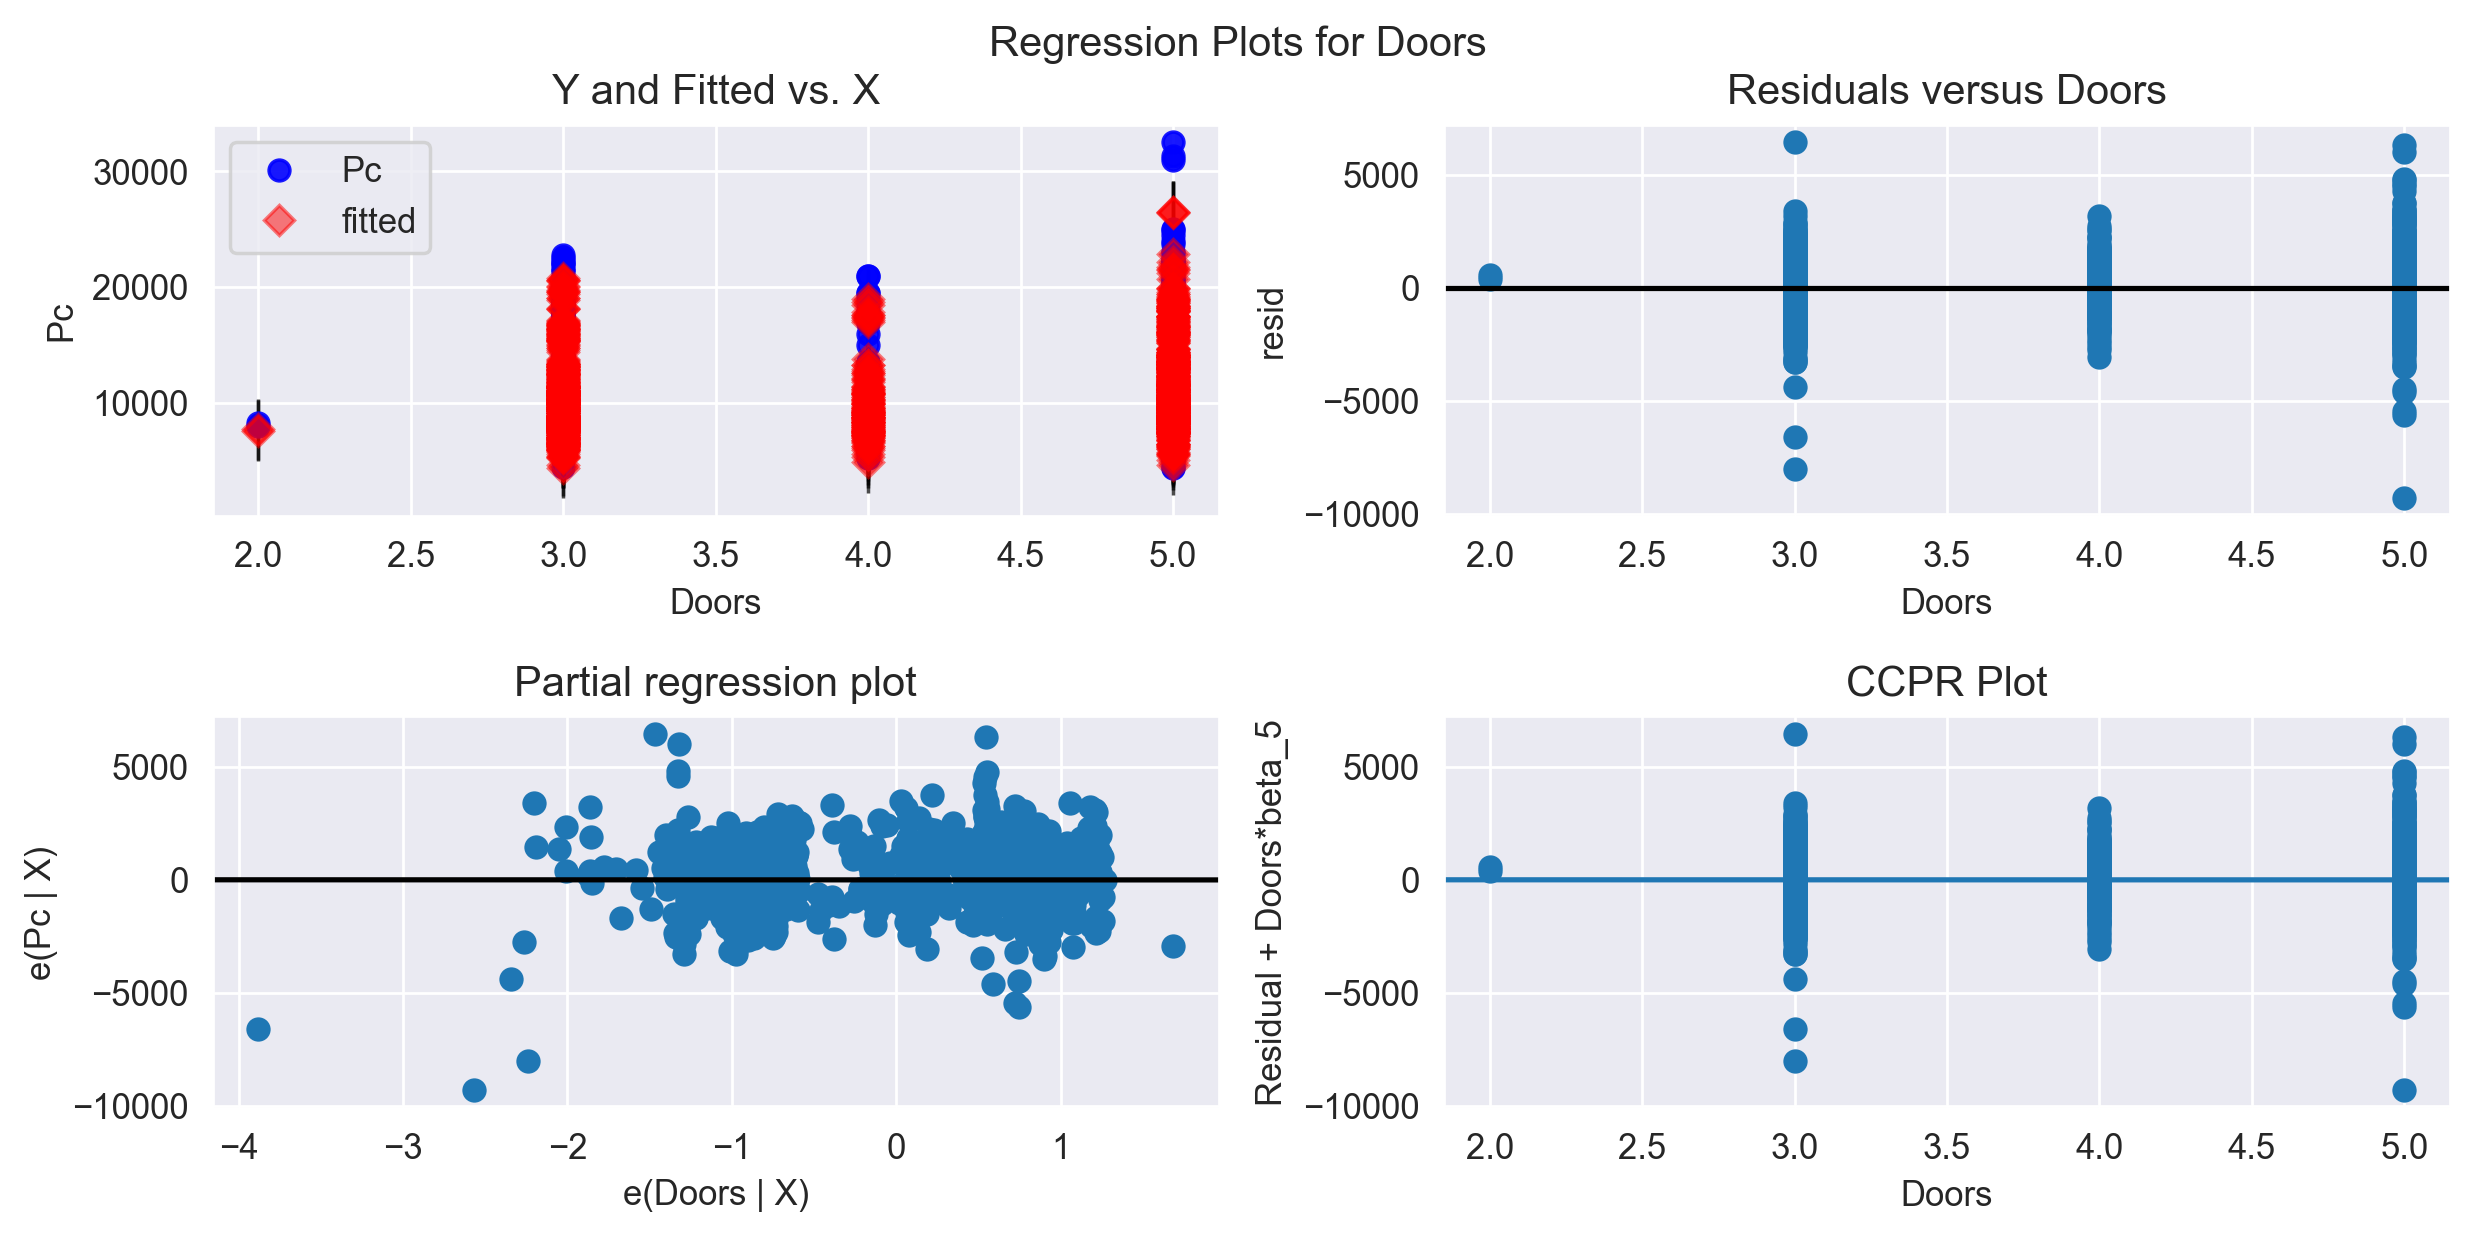

In [58]:
#Doors
sm.graphics.plot_regress_exog(model,'Doors');

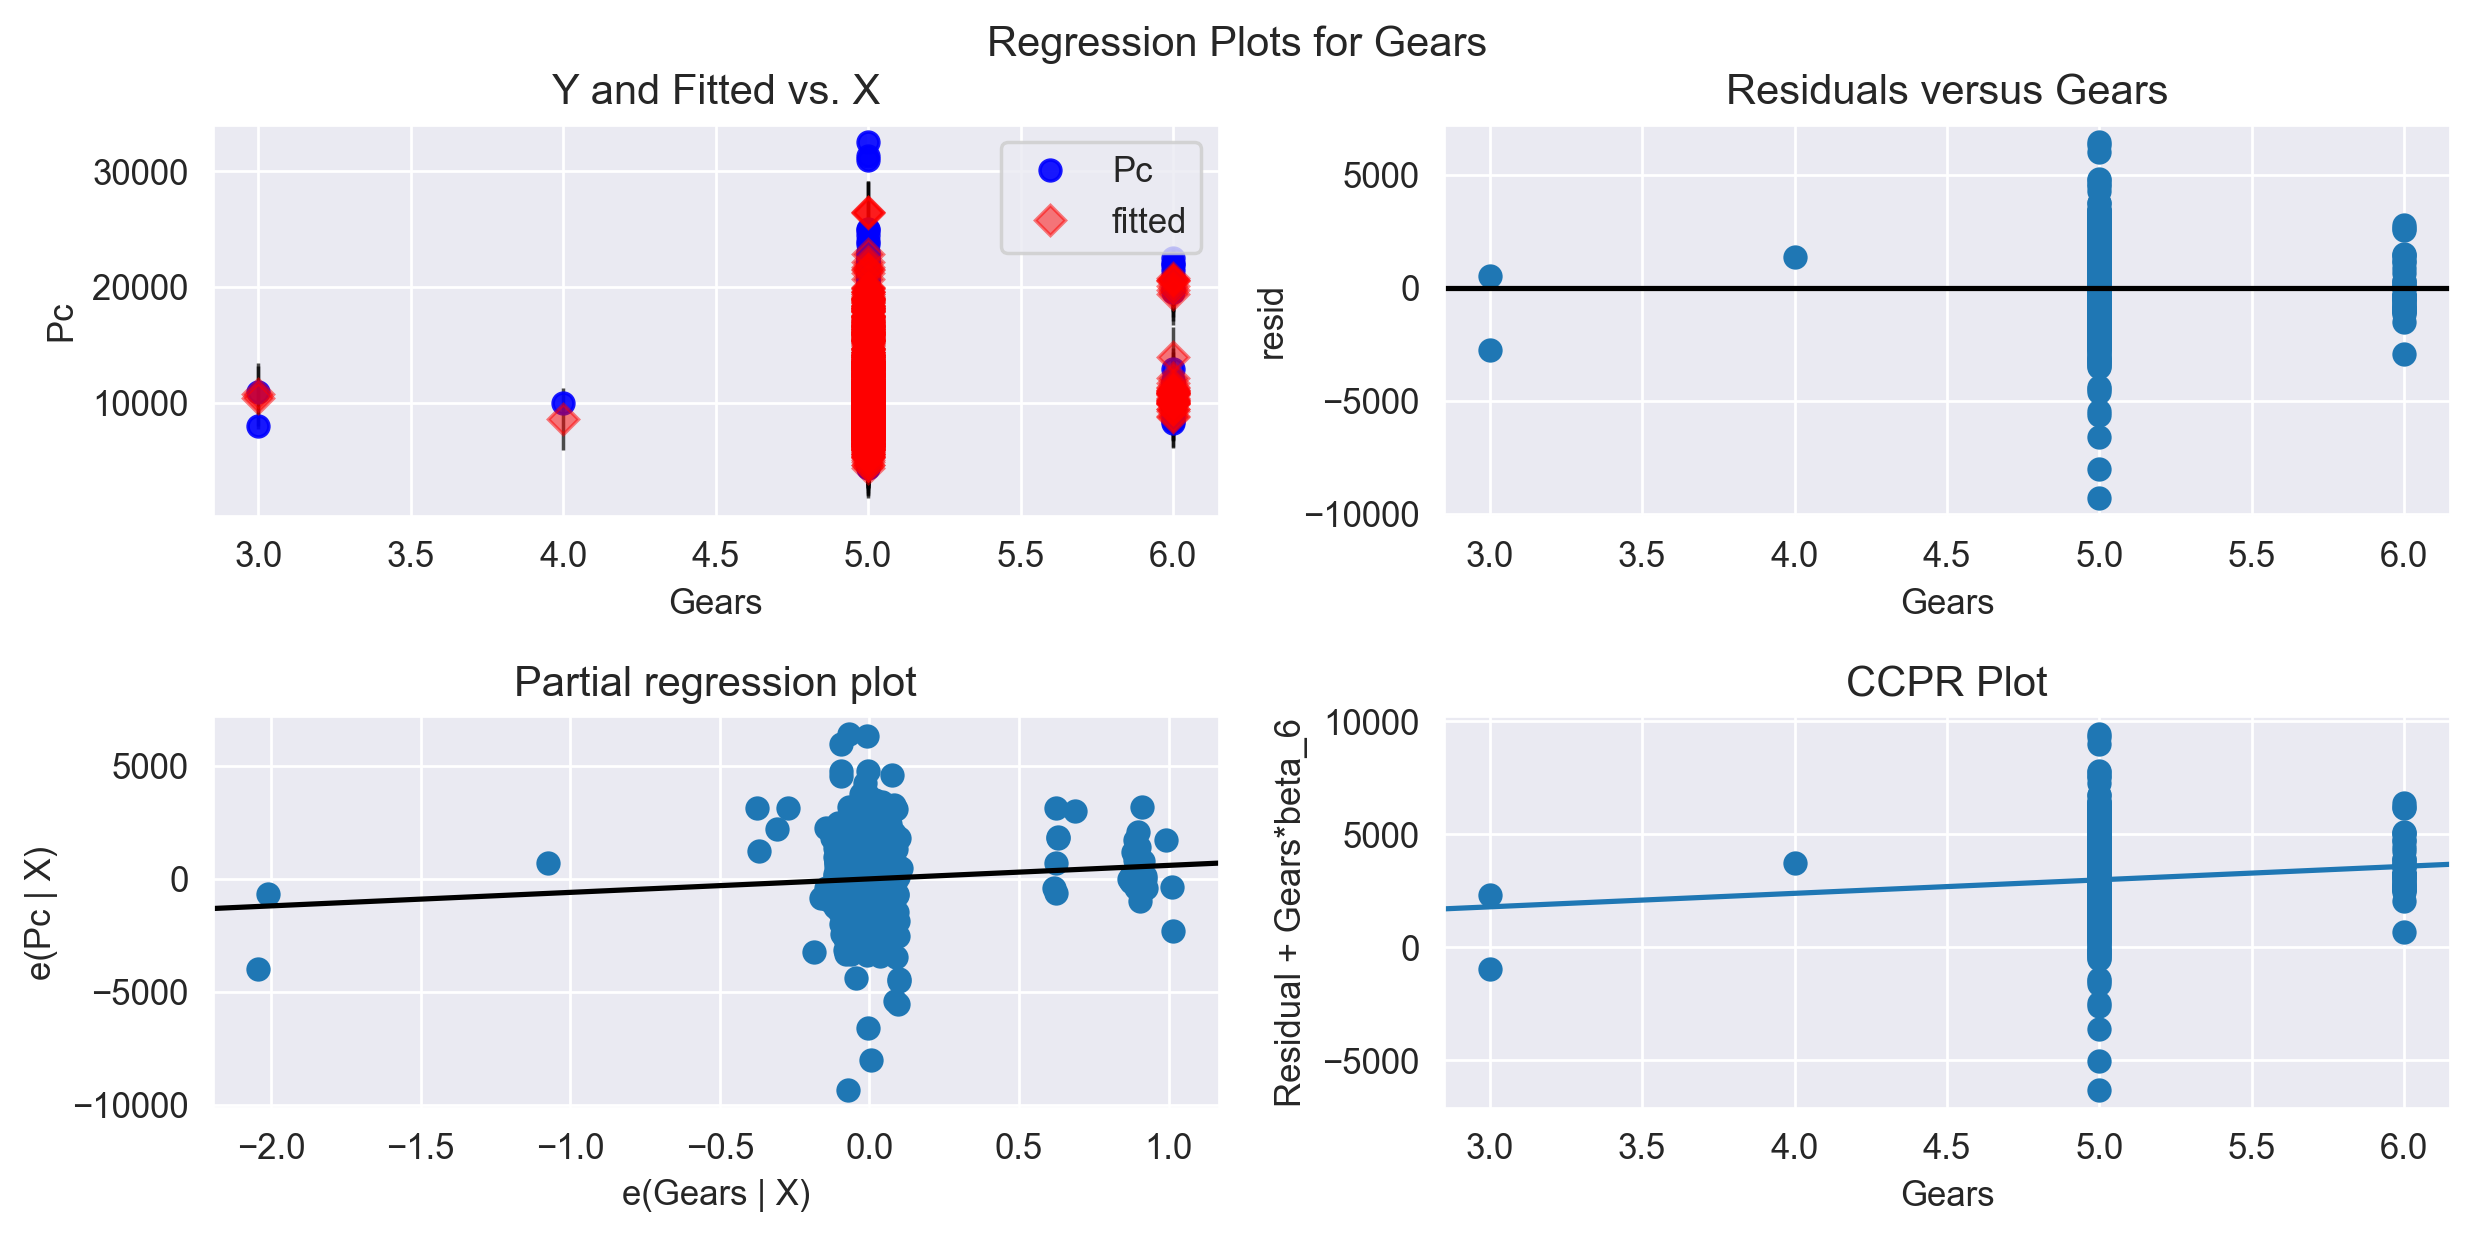

In [59]:
#Gears
sm.graphics.plot_regress_exog(model,'Gears');

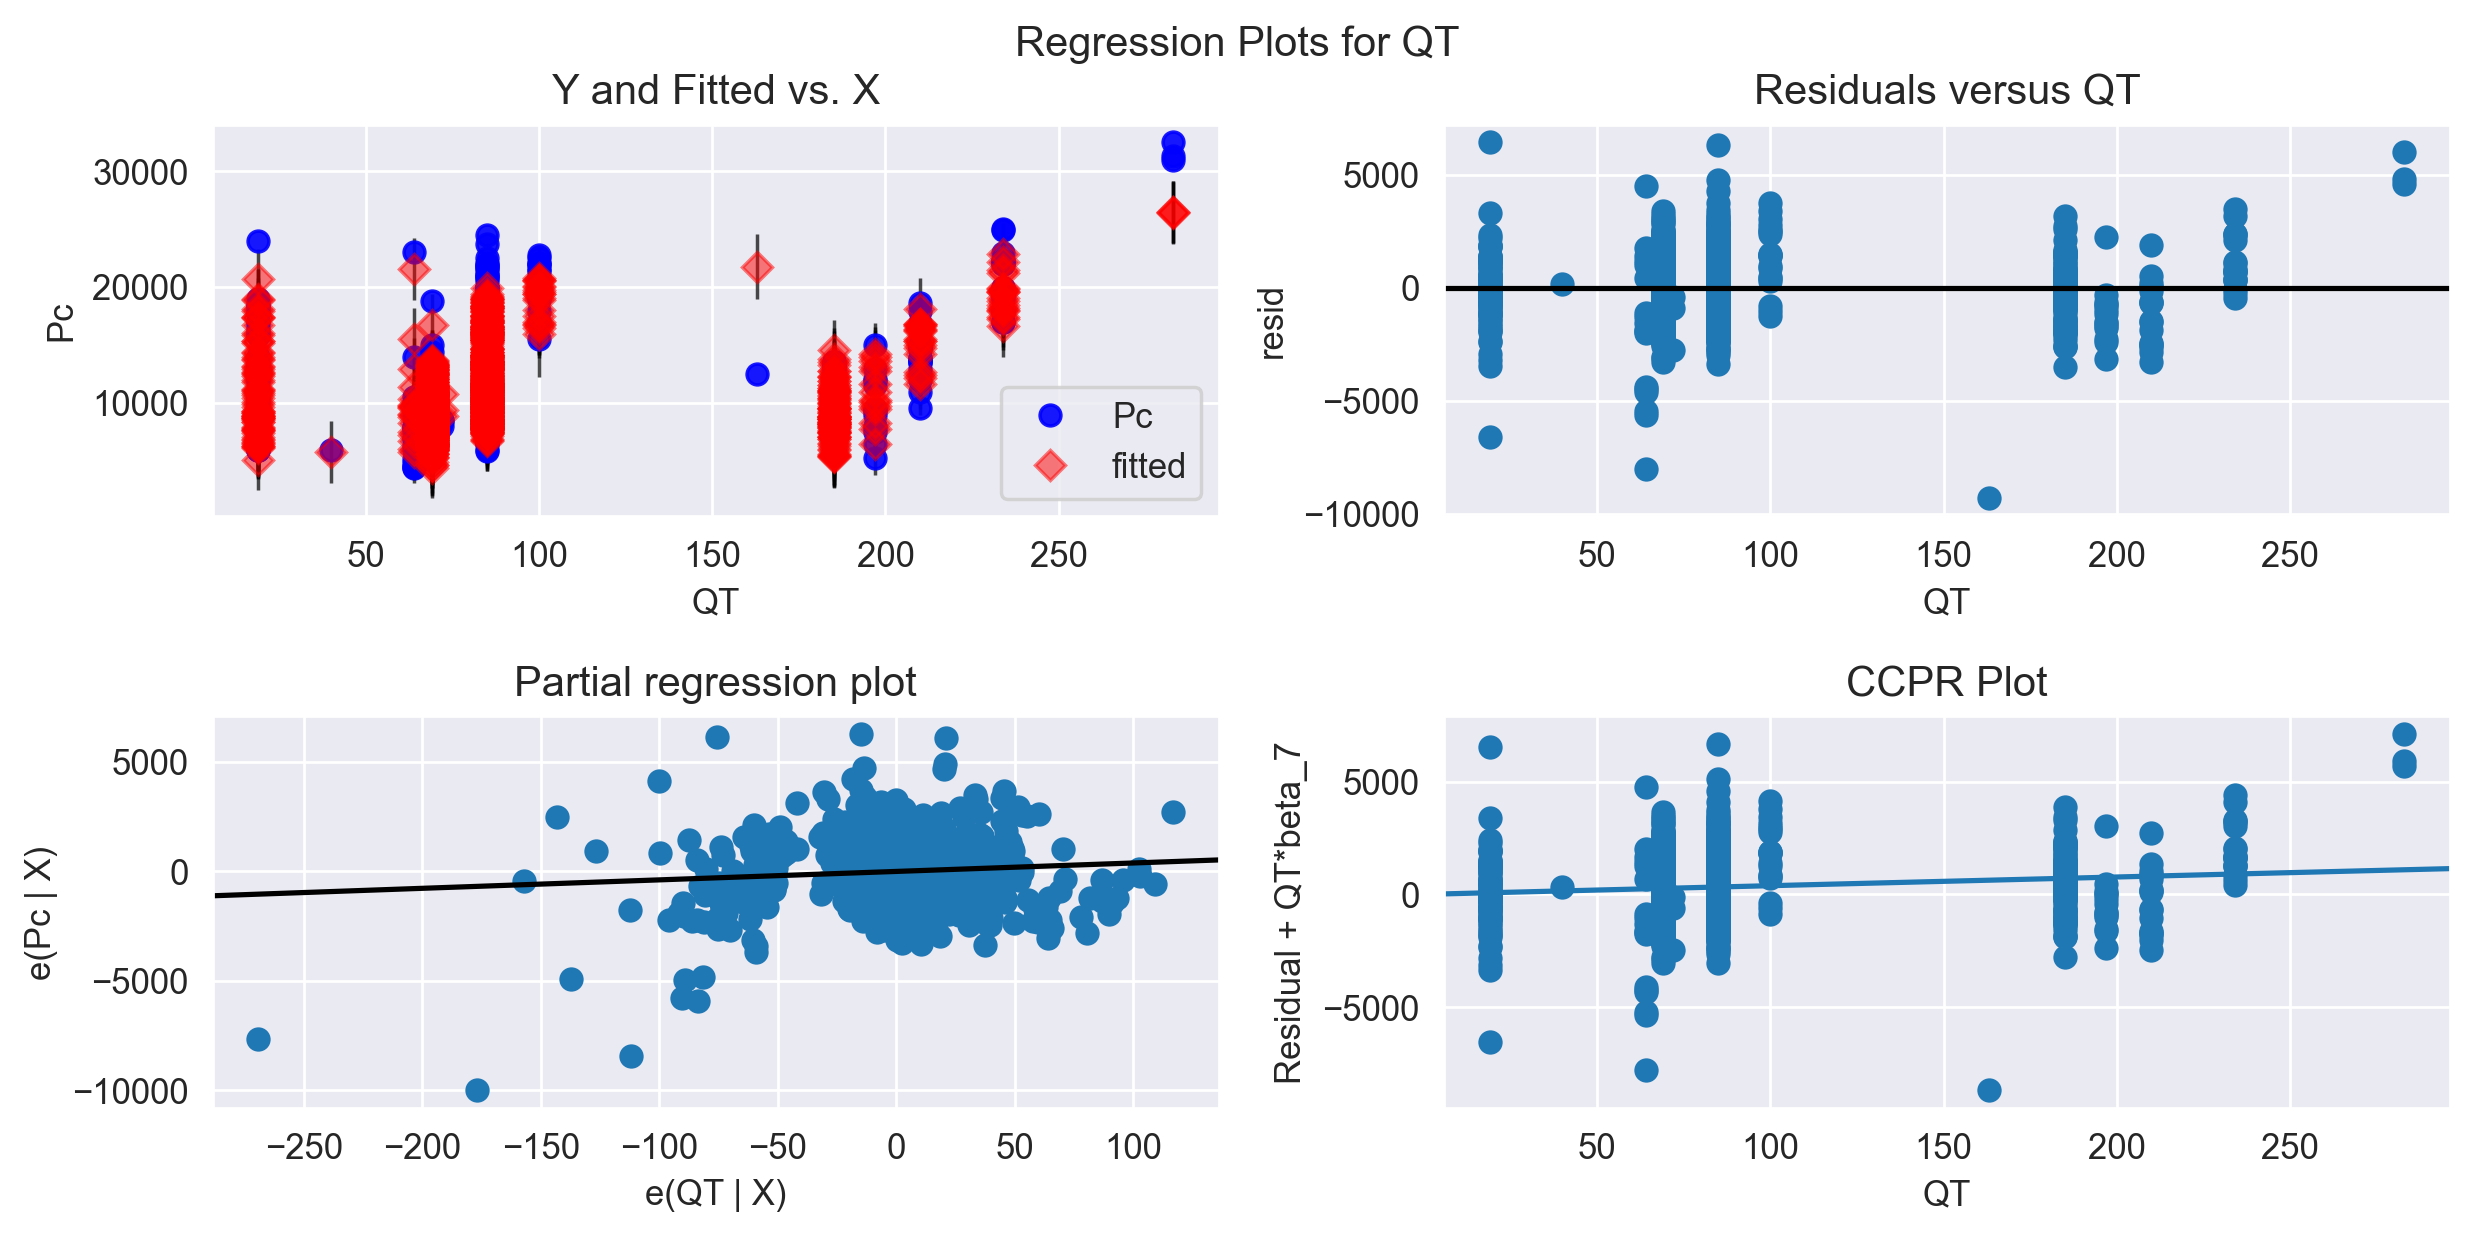

In [60]:
#QT
sm.graphics.plot_regress_exog(model,'QT');

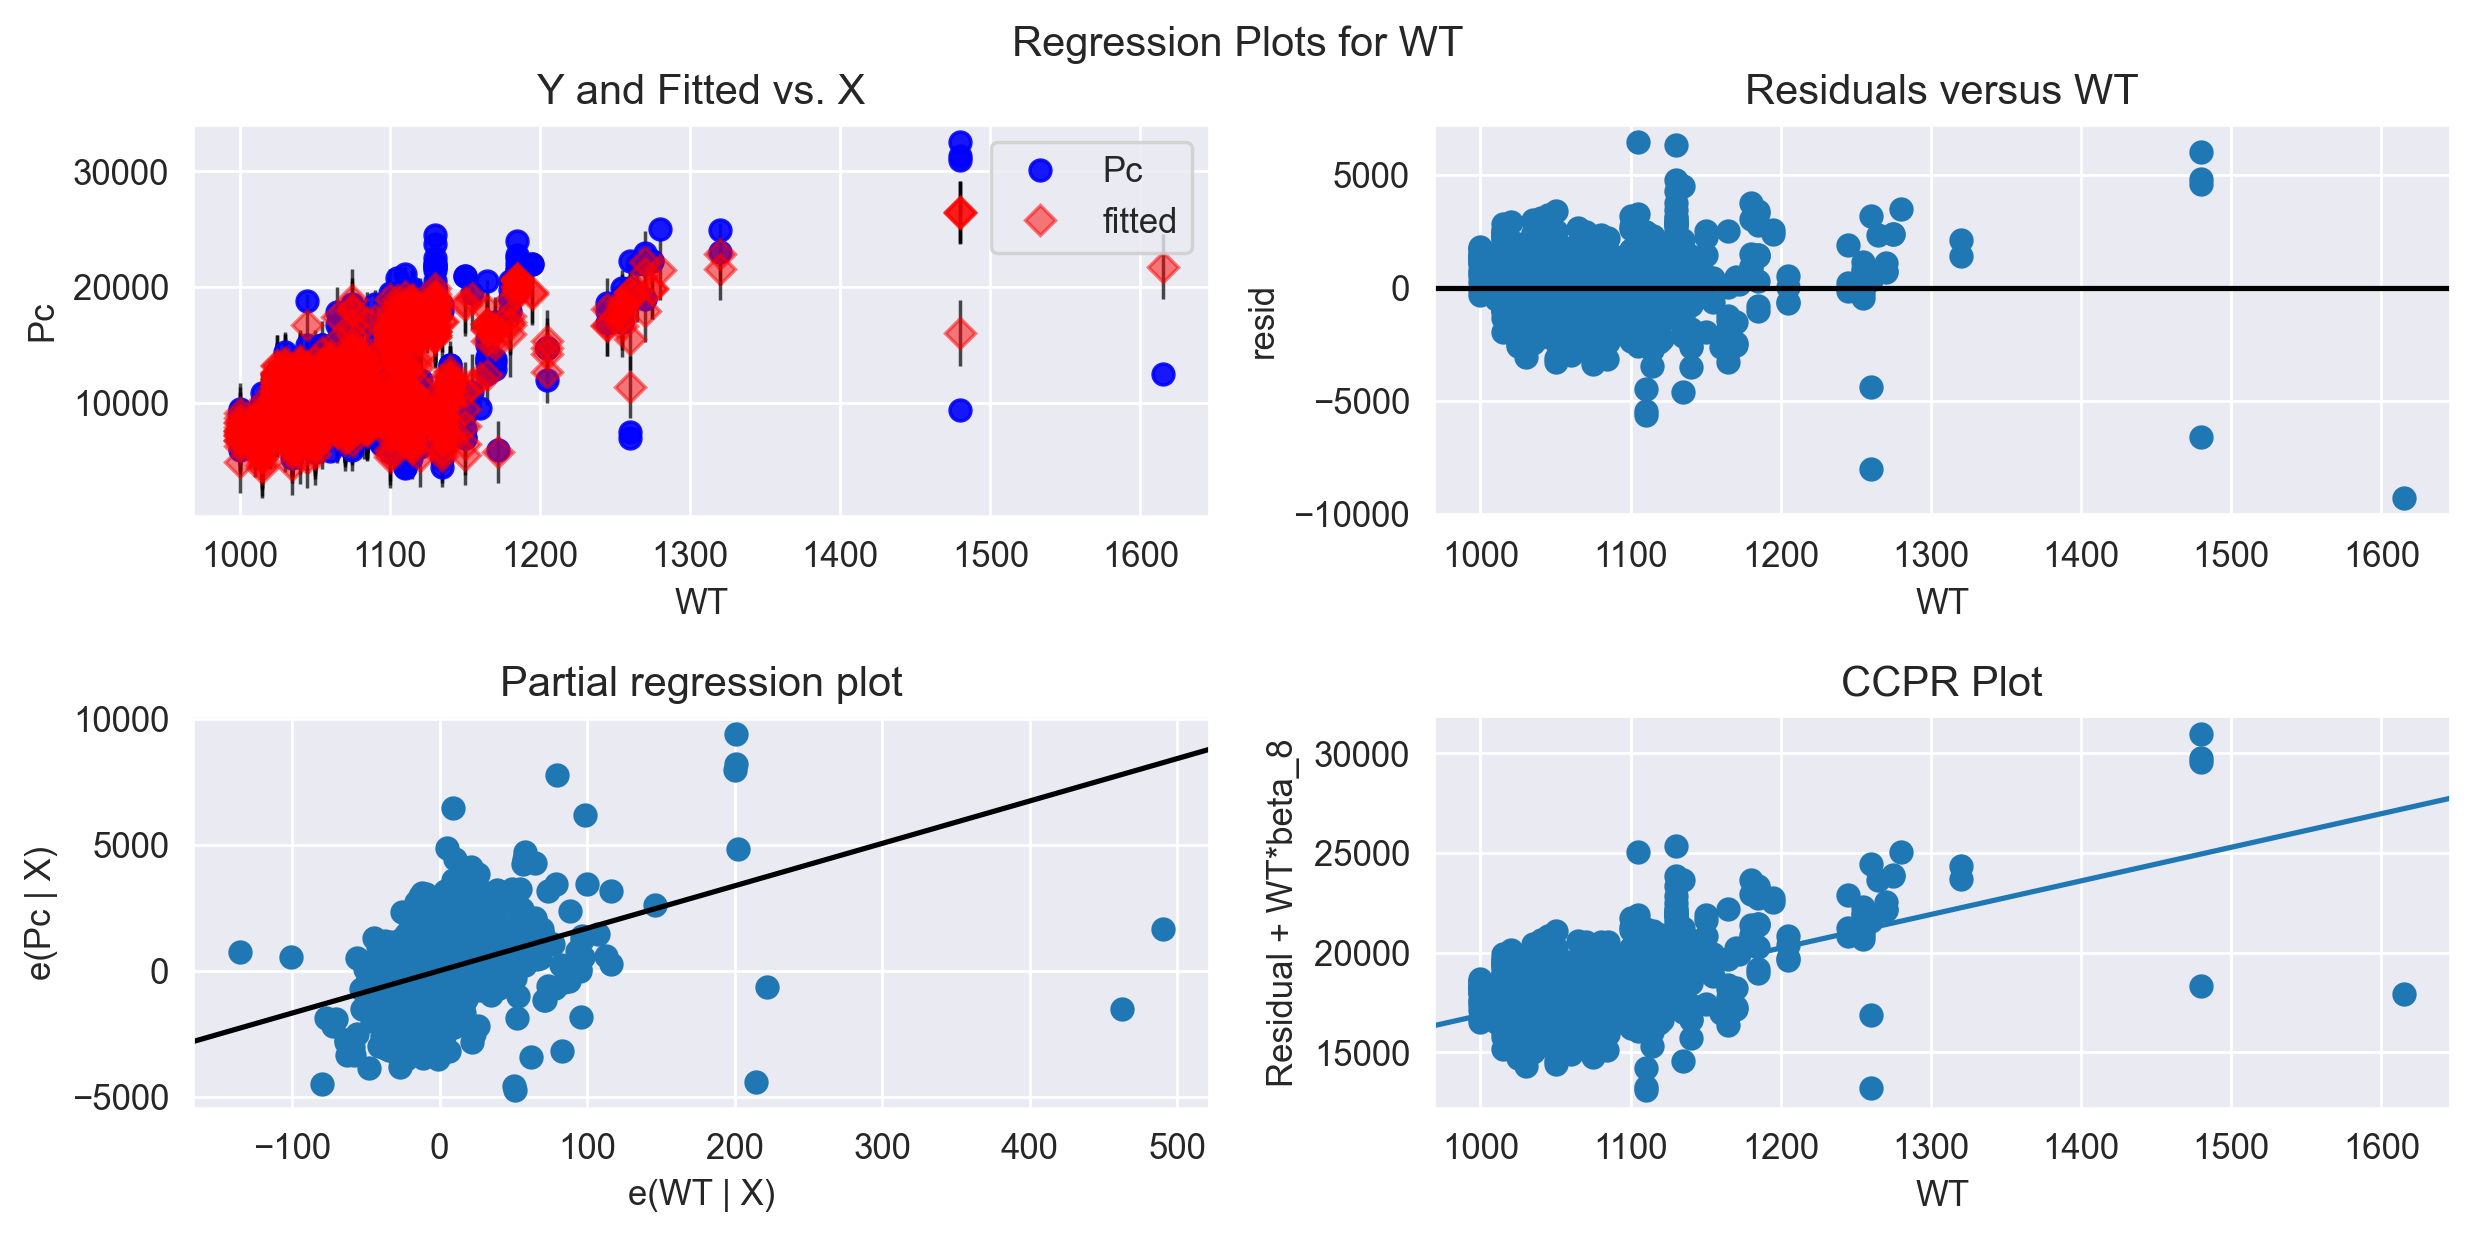

In [61]:
#WT
sm.graphics.plot_regress_exog(model,'WT');

In [62]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value

# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,p)=model.get_influence().cooks_distance

In [63]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

Text(0, 0.5, 'Cooks Distance')

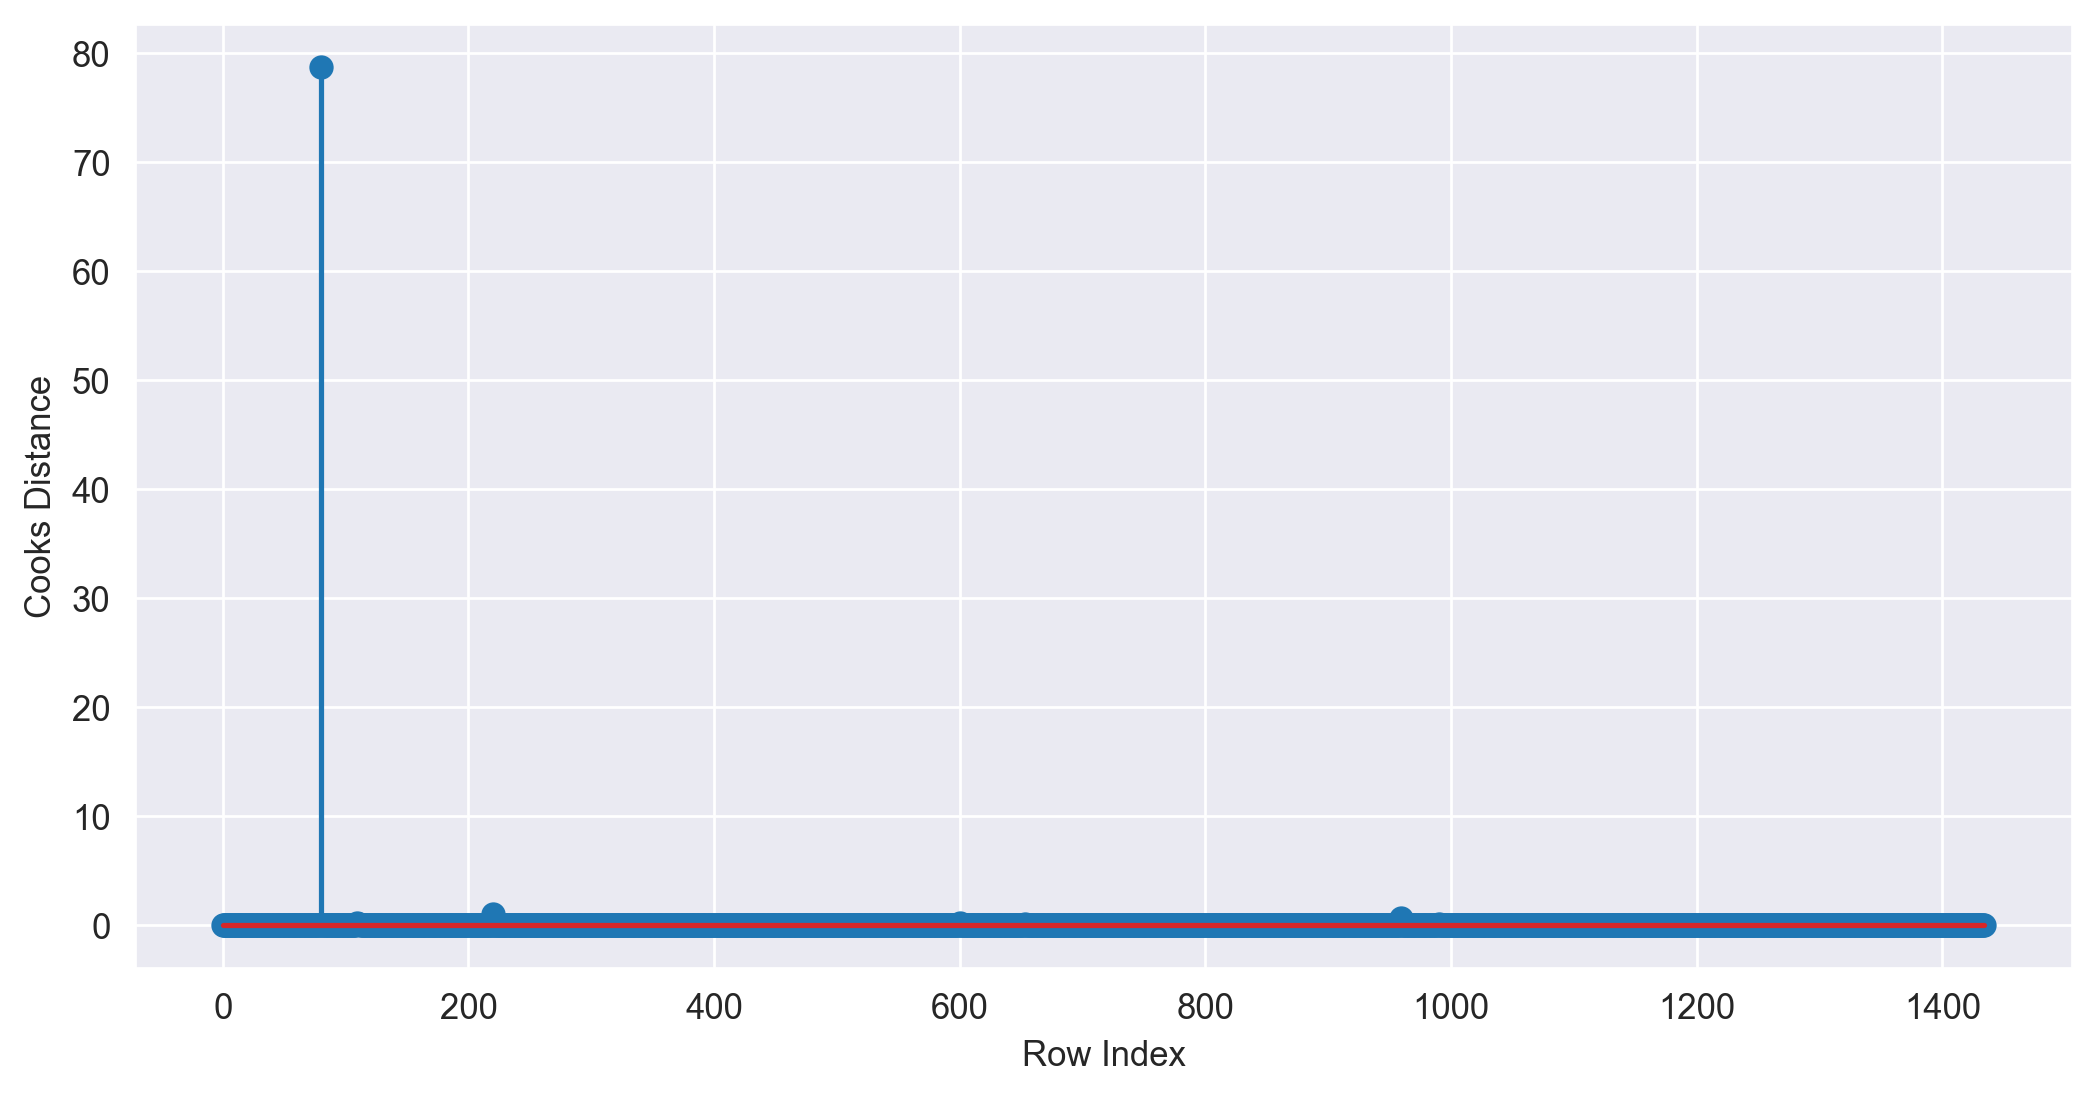

In [100]:
#Stem Plot
from statsmodels.graphics.regressionplots import influence_plot
plt.stem(range(len(df4)),c)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [101]:
np.argmax(c), np.max(c)

(80, 78.7295058224916)

In [110]:
df4.iloc[[80]]

Pc  Age     KM   HP     CC  Doors  Gears   QT    WT
80  18950   25  20019  110  16000      5      5  100  1180

In [ ]:
#levarage Cuttoff

In [103]:
df4.head()

Pc  Age     KM  HP    CC  Doors  Gears   QT    WT
0  13500   23  46986  90  2000      3      5  210  1165
1  13750   23  72937  90  2000      3      5  210  1165
2  13950   24  41711  90  2000      3      5  210  1165
3  14950   26  48000  90  2000      3      5  210  1165
4  13750   30  38500  90  2000      3      5  210  1170

In [104]:
k = 9
n =len(df4)

In [105]:
cutoff = 3*(k+1)/n

In [106]:
cutoff

0.020905923344947737

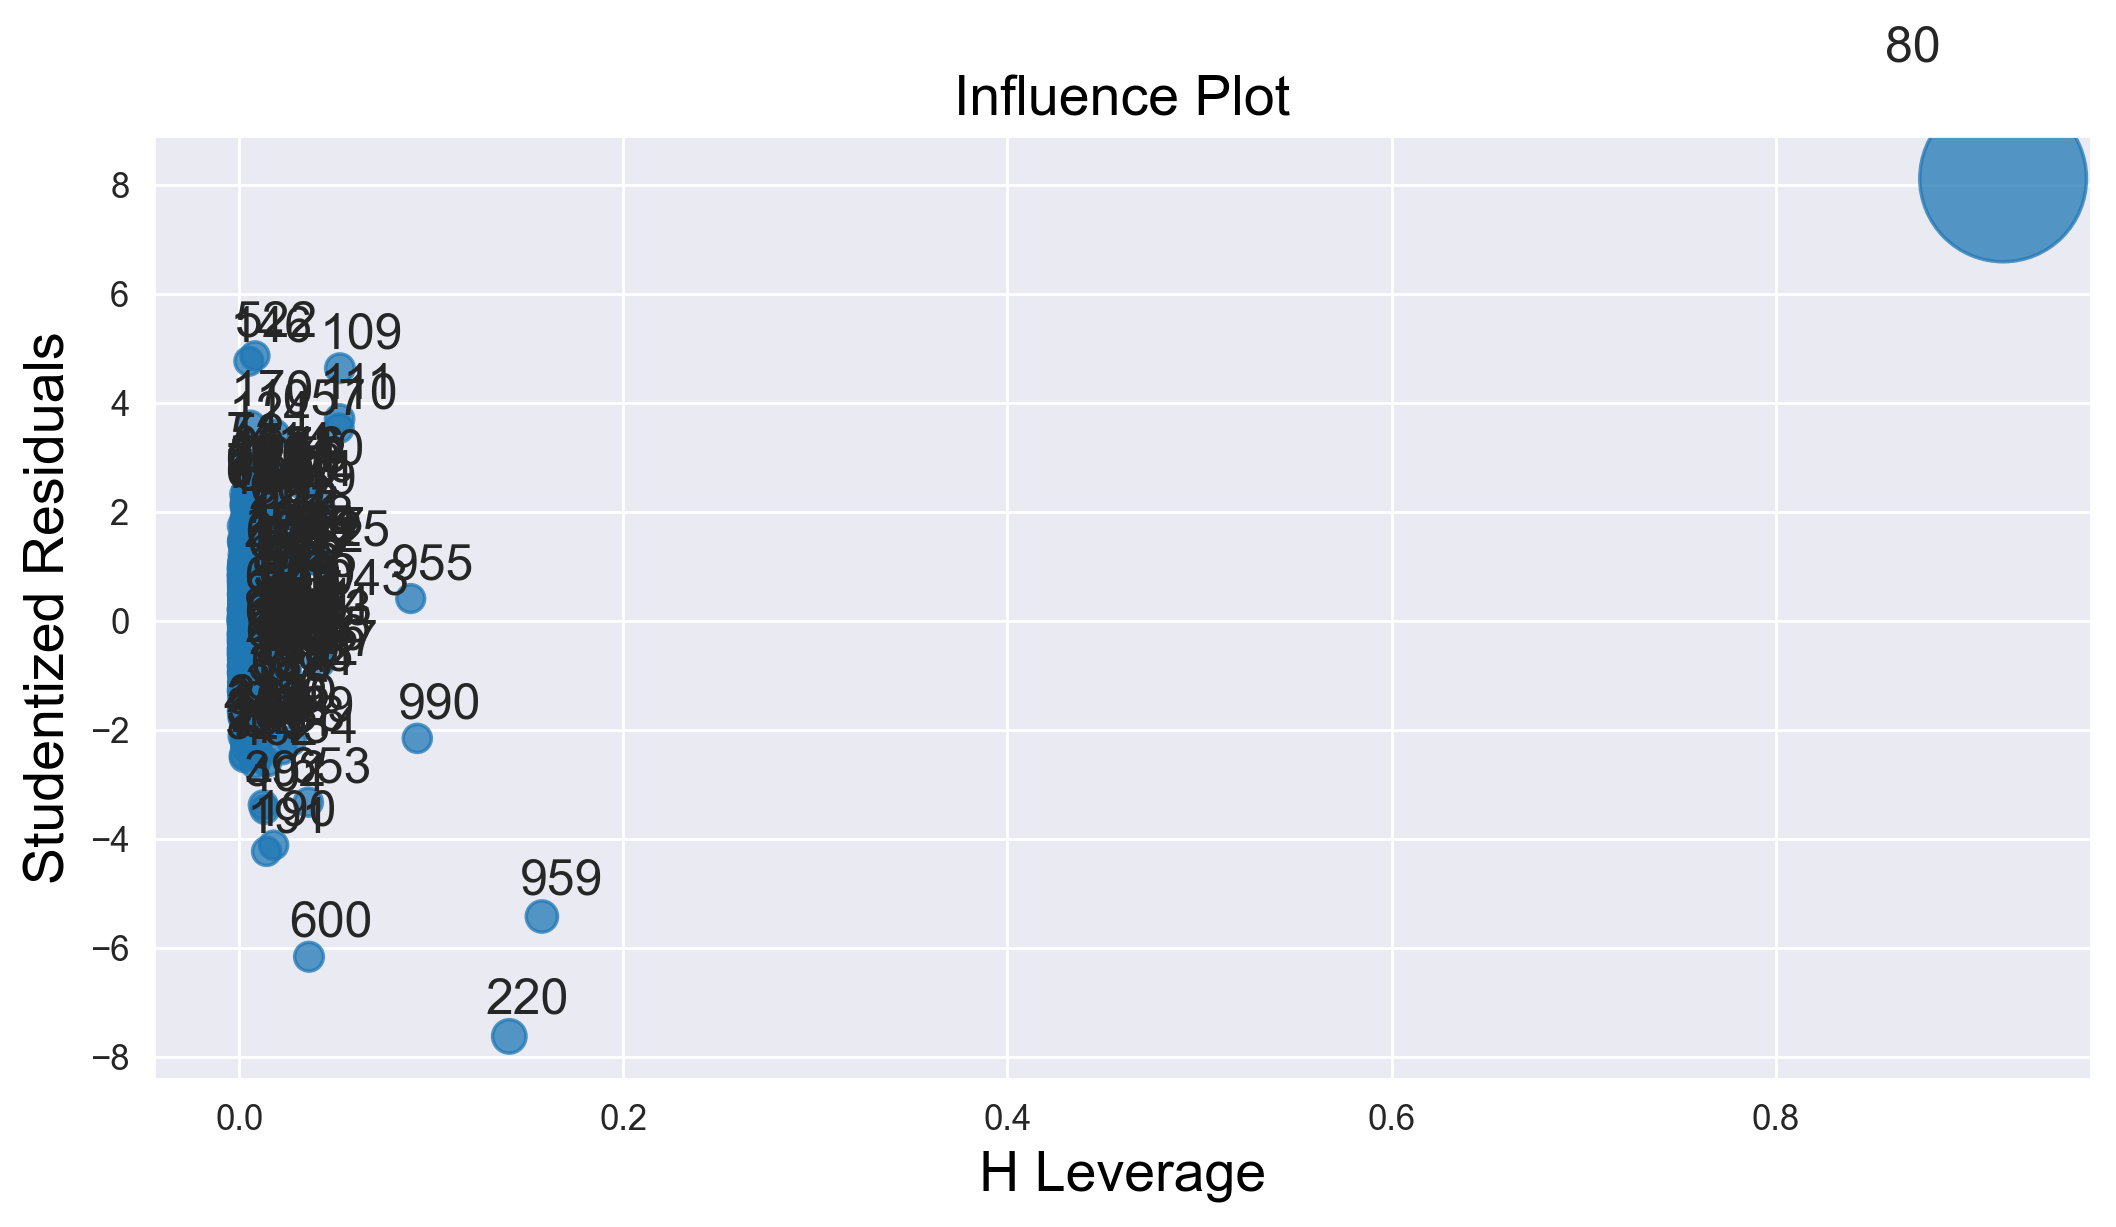

In [109]:
influence_plot(model);

In [ ]:
#improving the model

In [111]:
# Creating a copy of data so that original dataset is not affected
df_new=df4.copy()
df_new

Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1430   7500   69  20544   86  1300      3      5   69  1025
1431  10845   72  19000   86  1300      3      5   69  1015
1432   8500   71  17016   86  1300      3      5   69  1015
1433   7250   70  16916   86  1300      3      5   69  1015
1434   6950   76      1  110  1600      5      5   19  1114

[1435 rows x 9 columns]

In [112]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df5=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df5


Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1429   7500   69  20544   86  1300      3      5   69  1025
1430  10845   72  19000   86  1300      3      5   69  1015
1431   8500   71  17016   86  1300      3      5   69  1015
1432   7250   70  16916   86  1300      3      5   69  1015
1433   6950   76      1  110  1600      5      5   19  1114

[1434 rows x 9 columns]

In [119]:
#Model Deletion Diagnostics and Final Model
while np.max(c)>0.5:
    model=smf.ols('Pc~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df5=df5.drop(df5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df5
else:
    final_model=smf.ols('Pc~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [120]:
if np.max(c)>0.5:
    model=smf.ols('Pc~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df5=df5.drop(df5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df5 
elif np.max(c)<0.5:
    final_model=smf.ols('Pc~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [121]:
final_model.rsquared

0.8882395145171204

In [122]:
df5

Pc  Age     KM   HP    CC  Doors  Gears   QT    WT
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1426   7500   69  20544   86  1300      3      5   69  1025
1427  10845   72  19000   86  1300      3      5   69  1015
1428   8500   71  17016   86  1300      3      5   69  1015
1429   7250   70  16916   86  1300      3      5   69  1015
1430   6950   76      1  110  1600      5      5   19  1114

[1431 rows x 9 columns]

In [126]:
#Model Predictions 

new_data=pd.DataFrame({
    'Age':20,"KM":80000,"HP":100,"CC":1500,"Doors":4,"Gears":6,"QT":80,"WT":1512},index=[0])
new_data

Age     KM   HP    CC  Doors  Gears  QT    WT
0   20  80000  100  1500      4      6  80  1512

In [127]:
final_model.predict(new_data)


0    29276.79133
dtype: float64

In [128]:
# Automatic Prediction of Price with 89.00% accurcy
pred_y=final_model.predict(df5)
pred_y





0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64